In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster")
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
from scipy import stats
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Uploading Dataset and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/Video Game Capstone Project/Data Wrangling/vg_df.csv', delimiter='\t', index_col=0)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Vita,PSP,Sega Dreamcast,Xbox,Xbox 360,Xbox One
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,...,0,0,0,0,0,0,0,0,0,0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,...,0,0,0,0,0,0,0,0,0,0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,...,0,0,0,0,0,0,0,0,0,0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,...,0,0,0,0,0,0,0,0,0,0
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,...,0,0,0,0,0,0,0,0,0,0


** For each t-test below:
<br>
Ho = Factor does not sell differently
<br>
Ha = Factor does sell differently
<br>
α = 0.05**

In [3]:
# Make Box Plot of these: https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Running a t-test for Sports Games and Global Sales
print('Average amount of Sports Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Sports']['Global_Sales'].mean()))
print('Average amount of Non-Sports Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Sports']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Sports']['Global_Sales'], df.loc[df['Genre'] != 'Sports']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Sports Games and North American Sales
print('Average amount of Sports Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Sports']['NA_Sales'].mean()))
print('Average amount of Non-Sports Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Sports']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Sports']['NA_Sales'], df.loc[df['Genre'] != 'Sports']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Sports Games and European Sales
print('Average amount of Sports Games in European Sales: ' + str(df.loc[df['Genre'] == 'Sports']['EU_Sales'].mean()))
print('Average amount of Non-Sports Games in European Sales: ' + str(df.loc[df['Genre'] != 'Sports']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Sports']['EU_Sales'], df.loc[df['Genre'] != 'Sports']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Sports Games and Japanese Sales
print('Average amount of Sports Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Sports']['JP_Sales'].mean()))
print('Average amount of Non-Sports Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Sports']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Sports']['JP_Sales'], df.loc[df['Genre'] != 'Sports']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Sports Games in Global Sales: 0.884252386002
Average amount of Non-Sports Games in Global Sales: 0.760489629378
Global t-statistic: 1.17194954471
Global p-value: 0.241488449515


Average amount of Sports Games in North American Sales: 0.485174973489
Average amount of Non-Sports Games in North American Sales: 0.379943896634
North American t-statistic: 2.01076019702
North American p-value: 0.0446116187391


Average amount of Sports Games in European Sales: 0.262386002121
Average amount of Non-Sports Games in European Sales: 0.231873512411
European t-statistic: 0.786546764464
European p-value: 0.431730661455


Average amount of Sports Games in Japanese Sales: 0.0366277836691
Average amount of Non-Sports Games in Japanese Sales: 0.0685719143149
Japanese t-statistic: -3.64356311765
Japanese p-value: 0.00027852492399


Text(0.5,1,'Sports Game Sales')

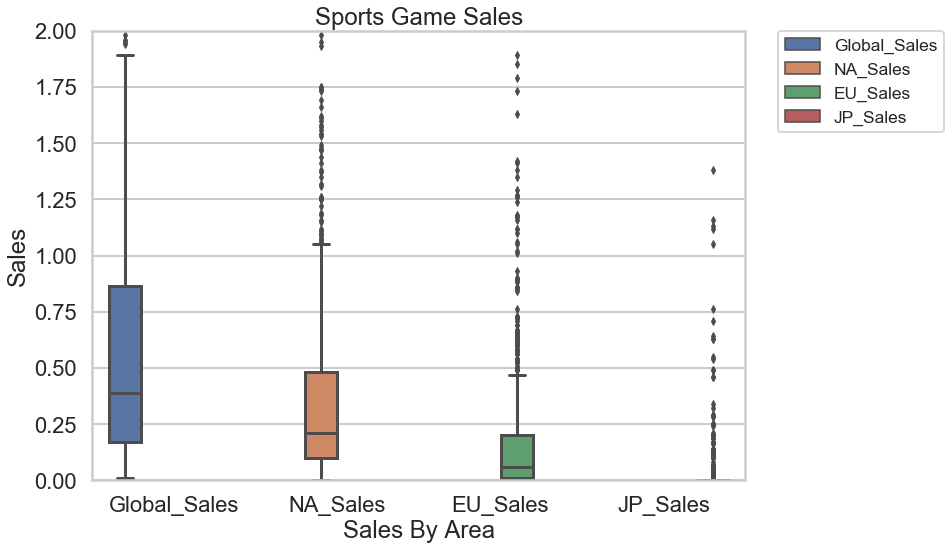

In [4]:
# Boxplot of Sports Game Sales
df_sports = pd.melt(df, id_vars='Sports', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_sports = df_sports[df_sports['Sports'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_sports, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Sports Game Sales')

** Because of how low the p-values are for North American and Japanese sales, we can reject the null hypothesis and say Sports games sell differently in those areas compared to Non-Sports games. In North America, they sell better while in Japan they sell worse.**

In [5]:
# Running a t-test for Racing Games and Global Sales
print('Average amount of Racing Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Racing']['Global_Sales'].mean()))
print('Average amount of Non-Racing Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Racing']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Racing']['Global_Sales'], df.loc[df['Genre'] != 'Racing']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Racing Games and North American Sales
print('Average amount of Racing Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Racing']['NA_Sales'].mean()))
print('Average amount of Non-Racing Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Racing']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Racing']['NA_Sales'], df.loc[df['Genre'] != 'Racing']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Racing Games and European Sales
print('Average amount of Racing Games in European Sales: ' + str(df.loc[df['Genre'] == 'Racing']['EU_Sales'].mean()))
print('Average amount of Non-Racing Games in European Sales: ' + str(df.loc[df['Genre'] != 'Racing']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Racing']['EU_Sales'], df.loc[df['Genre'] != 'Racing']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Racing Games and Japanese Sales
print('Average amount of Racing Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Racing']['JP_Sales'].mean()))
print('Average amount of Non-Racing Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Racing']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Racing']['JP_Sales'], df.loc[df['Genre'] != 'Racing']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Racing Games in Global Sales: 0.819655765921
Average amount of Non-Racing Games in Global Sales: 0.773675528507
Global t-statistic: 0.47645012398
Global p-value: 0.633910884732


Average amount of Racing Games in North American Sales: 0.388278829604
Average amount of Non-Racing Games in North American Sales: 0.395060858424
North American t-statistic: -0.161002046013
North American p-value: 0.872138825432


Average amount of Racing Games in European Sales: 0.283407917384
Average amount of Non-Racing Games in European Sales: 0.231686418962
European t-statistic: 1.52415562531
European p-value: 0.127947893857


Average amount of Racing Games in Japanese Sales: 0.0477796901893
Average amount of Non-Racing Games in Japanese Sales: 0.0656822549648
Japanese t-statistic: -1.33520887723
Japanese p-value: 0.182258889858


Text(0.5,1,'Racing Game Sales')

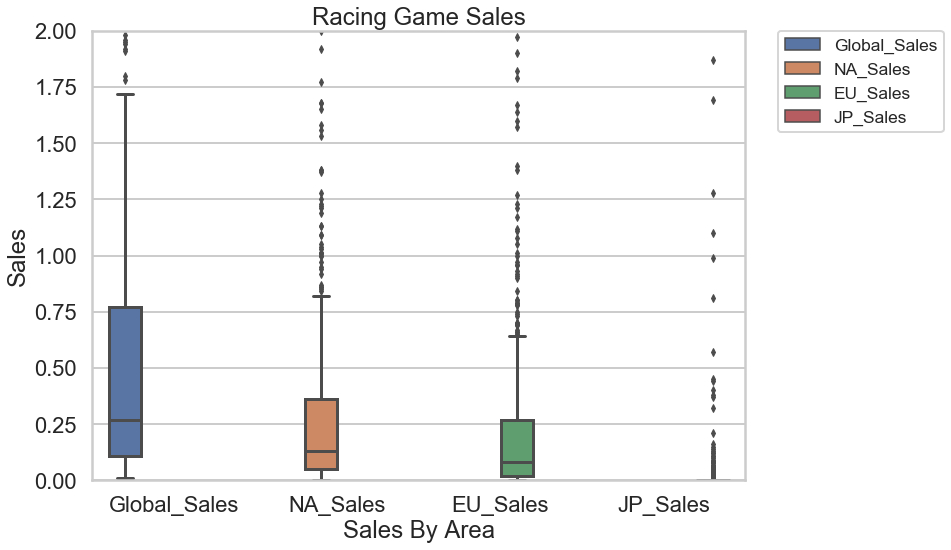

In [6]:
# Boxplot of Racing Game Sales
df_racing = pd.melt(df, id_vars='Racing', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_racing = df_racing[df_racing['Racing'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_racing, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Racing Game Sales')

** Because of how high the p-values are for Global and all regional sales, we cannot reject the null hypothesis. Therefore, Racing games do not sell better or worse in any area.**

In [7]:
# Running a t-test for Platform Games and Global Sales
print('Average amount of Platform Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Platform']['Global_Sales'].mean()))
print('Average amount of Non-Platform Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Platform']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Platform']['Global_Sales'], df.loc[df['Genre'] != 'Platform']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Platform Games and North American Sales
print('Average amount of Platform Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Platform']['NA_Sales'].mean()))
print('Average amount of Non-Platform Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Platform']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Platform']['NA_Sales'], df.loc[df['Genre'] != 'Platform']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Platform Games and European Sales
print('Average amount of Platform Games in European Sales: ' + str(df.loc[df['Genre'] == 'Platform']['EU_Sales'].mean()))
print('Average amount of Non-Platform Games in European Sales: ' + str(df.loc[df['Genre'] != 'Platform']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Platform']['EU_Sales'], df.loc[df['Genre'] != 'Platform']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Platform Games and Japanese Sales
print('Average amount of Platform Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Platform']['JP_Sales'].mean()))
print('Average amount of Non-Platform Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Platform']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Platform']['JP_Sales'], df.loc[df['Genre'] != 'Platform']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Platform Games in Global Sales: 0.93746898263
Average amount of Non-Platform Games in Global Sales: 0.767556835877
Global t-statistic: 1.38200569547
Global p-value: 0.167679671396


Average amount of Platform Games in North American Sales: 0.480397022333
Average amount of Non-Platform Games in North American Sales: 0.389092183121
North American t-statistic: 1.60744346006
North American p-value: 0.108674434194


Average amount of Platform Games in European Sales: 0.269379652605
Average amount of Non-Platform Games in European Sales: 0.234000311429
European t-statistic: 0.984999497536
European p-value: 0.325151443381


Average amount of Platform Games in Japanese Sales: 0.106923076923
Average amount of Non-Platform Games in Japanese Sales: 0.0614746184989
Japanese t-statistic: 1.89955050313
Japanese p-value: 0.0581792391687


Text(0.5,1,'Platform Game Sales')

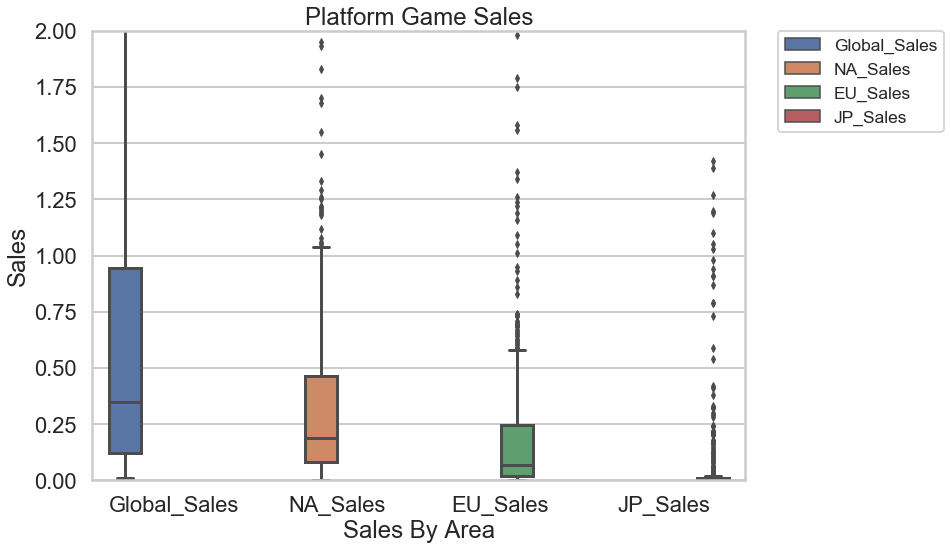

In [8]:
# Boxplot of Platform Game Sales
df_platform = pd.melt(df, id_vars='Platformer', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_platform = df_platform[df_platform['Platformer'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_platform, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Platform Game Sales')

** Because of how high the p-values are for Global and all regional sales, we cannot reject the null hypothesis. Therefore, Platform games do not sell better or worse in any area.**

In [9]:
# Running a t-test for Miscellaneous Games and Global Sales
print('Average amount of Miscellaneous Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Misc']['Global_Sales'].mean()))
print('Average amount of Non-Miscellaneous Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Misc']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Misc']['Global_Sales'], df.loc[df['Genre'] != 'Misc']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Miscellaneous Games and North American Sales
print('Average amount of Miscellaneous Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Misc']['NA_Sales'].mean()))
print('Average amount of Non-Miscellaneous Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Misc']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Misc']['NA_Sales'], df.loc[df['Genre'] != 'Misc']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Miscellaneous Games and European Sales
print('Average amount of Miscellaneous Games in European Sales: ' + str(df.loc[df['Genre'] == 'Misc']['EU_Sales'].mean()))
print('Average amount of Non-Miscellaneous Games in European Sales: ' + str(df.loc[df['Genre'] != 'Misc']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Misc']['EU_Sales'], df.loc[df['Genre'] != 'Misc']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Miscellaneous Games and Japanese Sales
print('Average amount of Miscellaneous Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Misc']['JP_Sales'].mean()))
print('Average amount of Non-Miscellaneous Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Misc']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Misc']['JP_Sales'], df.loc[df['Genre'] != 'Misc']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Miscellaneous Games in Global Sales: 1.08401041667
Average amount of Non-Miscellaneous Games in Global Sales: 0.759321533923
Global t-statistic: 2.51035427143
Global p-value: 0.0124443949407


Average amount of Miscellaneous Games in North American Sales: 0.578255208333
Average amount of Non-Miscellaneous Games in North American Sales: 0.383527402577
North American t-statistic: 2.90983971595
North American p-value: 0.00381423020127


Average amount of Miscellaneous Games in European Sales: 0.313697916667
Average amount of Non-Miscellaneous Games in European Sales: 0.231462505822
European t-statistic: 1.87898818823
European p-value: 0.0609499964677


Average amount of Miscellaneous Games in Japanese Sales: 0.0865104166667
Average amount of Non-Miscellaneous Games in Japanese Sales: 0.0628256481913
Japanese t-statistic: 1.2374056209
Japanese p-value: 0.216644481014


Text(0.5,1,'Miscellaneous Game Sales')

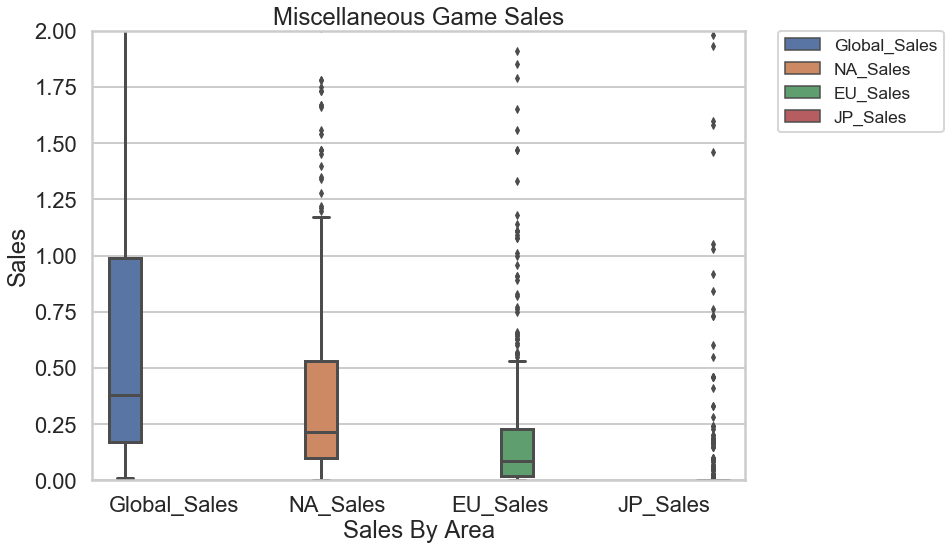

In [10]:
# Boxplot of Miscellaneous Game Sales
df_miscellaneous = pd.melt(df, id_vars='Variety', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_miscellaneous = df_miscellaneous[df_miscellaneous['Variety'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_miscellaneous, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Miscellaneous Game Sales')

** Because of how low the p-values are for Global and North American sales, we can reject the null hypothesis and say Miscellaneous games sell differently in those areas compared to Non-Miscellaneous games. In both areas, they sell better.**

In [11]:
# Running a t-test for Action Games and Global Sales
print('Average amount of Action Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Action']['Global_Sales'].mean()))
print('Average amount of Non-Action Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Action']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Action']['Global_Sales'], df.loc[df['Genre'] != 'Action']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Action Games and North American Sales
print('Average amount of Action Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Action']['NA_Sales'].mean()))
print('Average amount of Non-Action Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Action']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Action']['NA_Sales'], df.loc[df['Genre'] != 'Action']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Action Games and European Sales
print('Average amount of Action Games in European Sales: ' + str(df.loc[df['Genre'] == 'Action']['EU_Sales'].mean()))
print('Average amount of Non-Action Games in European Sales: ' + str(df.loc[df['Genre'] != 'Action']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Action']['EU_Sales'], df.loc[df['Genre'] != 'Action']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Action Games and Japanese Sales
print('Average amount of Action Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Action']['JP_Sales'].mean()))
print('Average amount of Non-Action Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Action']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Action']['JP_Sales'], df.loc[df['Genre'] != 'Action']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Action Games in Global Sales: 0.738134969325
Average amount of Non-Action Games in Global Sales: 0.789969201155
Global t-statistic: -1.11041574795
Global p-value: 0.266889190403


Average amount of Action Games in North American Sales: 0.362717791411
Average amount of Non-Action Games in North American Sales: 0.404450433109
North American t-statistic: -1.84119807929
North American p-value: 0.0656667935079


Average amount of Action Games in European Sales: 0.237901840491
Average amount of Non-Action Games in European Sales: 0.235520692974
European t-statistic: 0.143362781226
European p-value: 0.88601145251


Average amount of Action Games in Japanese Sales: 0.0467300613497
Average amount of Non-Action Games in Japanese Sales: 0.0696265640038
Japanese t-statistic: -4.01629191457
Japanese p-value: 5.98424863125e-05


Text(0.5,1,'Action Game Sales')

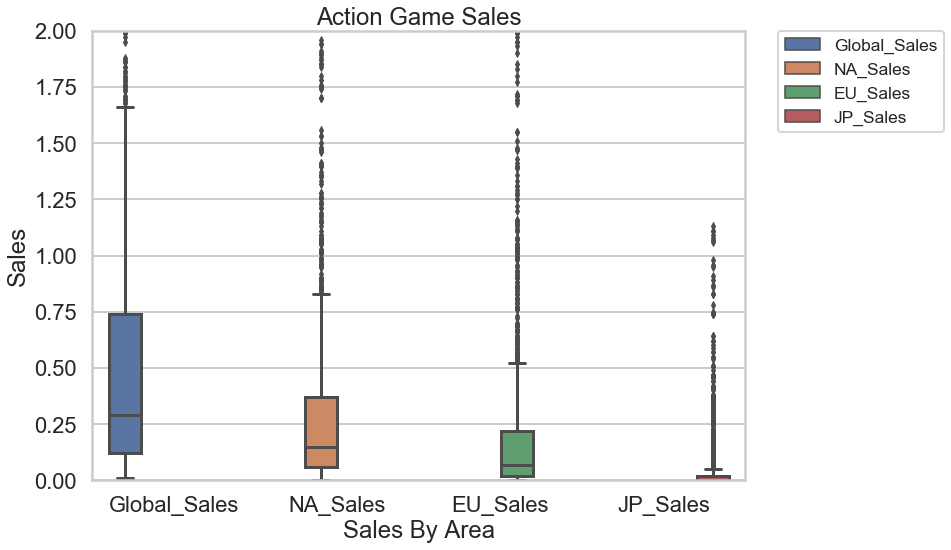

In [12]:
# Boxplot of Action Game Sales
df_action = pd.melt(df, id_vars='Action', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_action = df_action[df_action['Action'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_action, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Action Game Sales')

** Because of how low the p-value is for Japanese sales, we can reject the null hypothesis and say Action games sell differently in that area compared to Non-Action games. In Japan, they sell worse.**

In [13]:
# Running a t-test for Puzzle Games and Global Sales
print('Average amount of Puzzle Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Puzzle']['Global_Sales'].mean()))
print('Average amount of Non-Puzzle Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Puzzle']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Puzzle']['Global_Sales'], df.loc[df['Genre'] != 'Puzzle']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Puzzle Games and North American Sales
print('Average amount of Puzzle Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Puzzle']['NA_Sales'].mean()))
print('Average amount of Non-Puzzle Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Puzzle']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Puzzle']['NA_Sales'], df.loc[df['Genre'] != 'Puzzle']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Puzzle Games and European Sales
print('Average amount of Puzzle Games in European Sales: ' + str(df.loc[df['Genre'] == 'Puzzle']['EU_Sales'].mean()))
print('Average amount of Non-Puzzle Games in European Sales: ' + str(df.loc[df['Genre'] != 'Puzzle']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Puzzle']['EU_Sales'], df.loc[df['Genre'] != 'Puzzle']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Puzzle Games and Japanese Sales
print('Average amount of Puzzle Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Puzzle']['JP_Sales'].mean()))
print('Average amount of Non-Puzzle Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Puzzle']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Puzzle']['JP_Sales'], df.loc[df['Genre'] != 'Puzzle']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Puzzle Games in Global Sales: 0.668644067797
Average amount of Non-Puzzle Games in Global Sales: 0.779506485761
Global t-statistic: -0.733656323447
Global p-value: 0.464552576292


Average amount of Puzzle Games in North American Sales: 0.283898305085
Average amount of Non-Puzzle Games in North American Sales: 0.396429103921
North American t-statistic: -2.48250506817
North American p-value: 0.0142734047365


Average amount of Puzzle Games in European Sales: 0.203728813559
Average amount of Non-Puzzle Games in European Sales: 0.236658714776
European t-statistic: -0.581981522503
European p-value: 0.561650018105


Average amount of Puzzle Games in Japanese Sales: 0.126949152542
Average amount of Non-Puzzle Games in Japanese Sales: 0.0630535261667
Japanese t-statistic: 1.31140824099
Japanese p-value: 0.192262168519


Text(0.5,1,'Puzzle Game Sales')

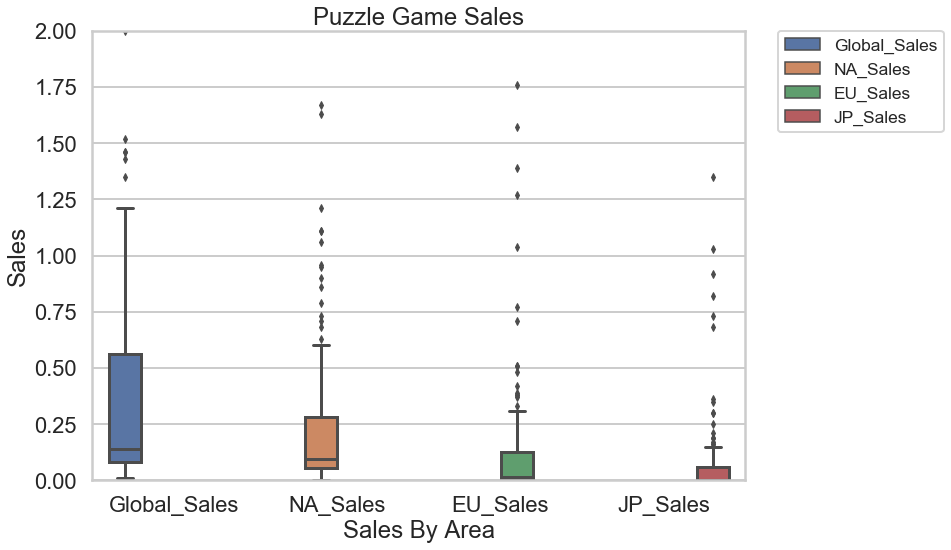

In [14]:
# Boxplot of Puzzle Game Sales
df_puzzle = pd.melt(df, id_vars='Puzzler', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_puzzle = df_puzzle[df_puzzle['Puzzler'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_puzzle, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Puzzle Game Sales')

** Because of how low the p-value is for North American sales, we can reject the null hypothesis and say Puzzle games sell differently in that area compared to Non-Puzzle games. In North America, they sell worse.**

In [15]:
# Running a t-test for Shooter Games and Global Sales
print('Average amount of Shooter Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Shooter']['Global_Sales'].mean()))
print('Average amount of Non-Shooter Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Shooter']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Shooter']['Global_Sales'], df.loc[df['Genre'] != 'Shooter']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Shooter Games and North American Sales
print('Average amount of Shooter Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Shooter']['NA_Sales'].mean()))
print('Average amount of Non-Shooter Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Shooter']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Shooter']['NA_Sales'], df.loc[df['Genre'] != 'Shooter']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Shooter Games and European Sales
print('Average amount of Shooter Games in European Sales: ' + str(df.loc[df['Genre'] == 'Shooter']['EU_Sales'].mean()))
print('Average amount of Non-Shooter Games in European Sales: ' + str(df.loc[df['Genre'] != 'Shooter']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Shooter']['EU_Sales'], df.loc[df['Genre'] != 'Shooter']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Shooter Games and Japanese Sales
print('Average amount of Shooter Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Shooter']['JP_Sales'].mean()))
print('Average amount of Non-Shooter Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Shooter']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Shooter']['JP_Sales'], df.loc[df['Genre'] != 'Shooter']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Shooter Games in Global Sales: 0.945
Average amount of Non-Shooter Games in Global Sales: 0.753324945479
Global t-statistic: 2.81542661079
Global p-value: 0.00495323442131


Average amount of Shooter Games in North American Sales: 0.519398148148
Average amount of Non-Shooter Games in North American Sales: 0.376378124476
North American t-statistic: 3.70196221614
North American p-value: 0.000224882696955


Average amount of Shooter Games in European Sales: 0.302222222222
Average amount of Non-Shooter Games in European Sales: 0.226503942292
European t-statistic: 3.35951879336
European p-value: 0.000804930878887


Average amount of Shooter Games in Japanese Sales: 0.0214930555556
Average amount of Non-Shooter Games in Japanese Sales: 0.070342224459
Japanese t-statistic: -10.1426826727
Japanese p-value: 6.05572168281e-24


Text(0.5,1,'Shooting Game Sales')

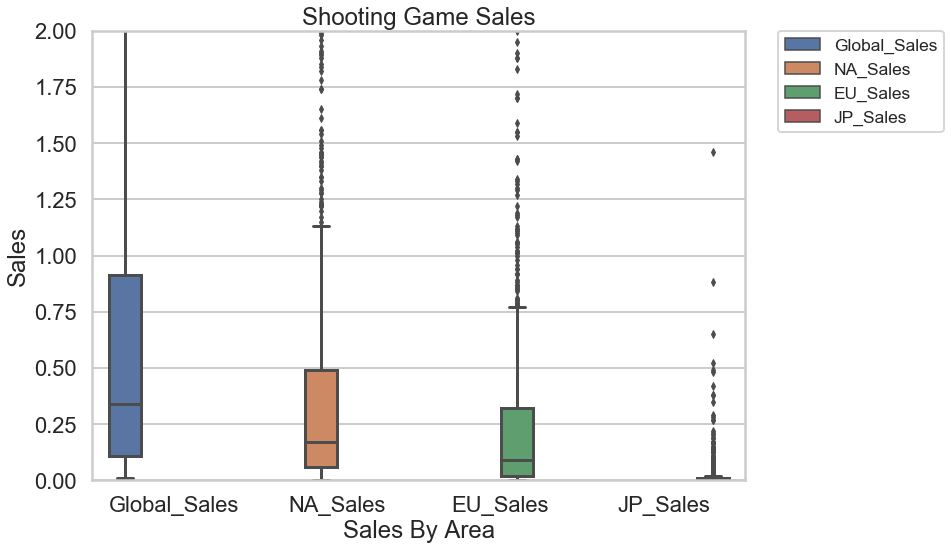

In [16]:
# Boxplot of Shooting Game Sales
df_shooter = pd.melt(df, id_vars='Shooter', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_shooter = df_shooter[df_shooter['Shooter'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_shooter, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Shooting Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Shooter games sell differently in those areas compared to Non-Shooter games. In all areas except Japan, they sell better while in Japan they sell worse.**

In [17]:
# Running a t-test for Fighting Games and Global Sales
print('Average amount of Fighting Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Fighting']['Global_Sales'].mean()))
print('Average amount of Non-Fighting Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Fighting']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Fighting']['Global_Sales'], df.loc[df['Genre'] != 'Fighting']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Fighting Games and North American Sales
print('Average amount of Fighting Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Fighting']['NA_Sales'].mean()))
print('Average amount of Non-Fighting Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Fighting']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Fighting']['NA_Sales'], df.loc[df['Genre'] != 'Fighting']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Fighting Games and European Sales
print('Average amount of Fighting Games in European Sales: ' + str(df.loc[df['Genre'] == 'Fighting']['EU_Sales'].mean()))
print('Average amount of Non-Fighting Games in European Sales: ' + str(df.loc[df['Genre'] != 'Fighting']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Fighting']['EU_Sales'], df.loc[df['Genre'] != 'Fighting']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Fighting Games and Japanese Sales
print('Average amount of Fighting Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Fighting']['JP_Sales'].mean()))
print('Average amount of Non-Fighting Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Fighting']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Fighting']['JP_Sales'], df.loc[df['Genre'] != 'Fighting']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Fighting Games in Global Sales: 0.661243386243
Average amount of Non-Fighting Games in Global Sales: 0.784411354118
Global t-statistic: -2.02980931057
Global p-value: 0.0428614868899


Average amount of Fighting Games in North American Sales: 0.36082010582
Average amount of Non-Fighting Games in North American Sales: 0.396457266946
North American t-statistic: -1.11862370794
North American p-value: 0.263818168905


Average amount of Fighting Games in European Sales: 0.160052910053
Average amount of Non-Fighting Games in European Sales: 0.240547541492
European t-statistic: -4.6865646623
European p-value: 3.35354958821e-06


Average amount of Fighting Games in Japanese Sales: 0.0736772486772
Average amount of Non-Fighting Games in Japanese Sales: 0.0636001240887
Japanese t-statistic: 0.857974978327
Japanese p-value: 0.391352759599


Text(0.5,1,'Fighting Game Sales')

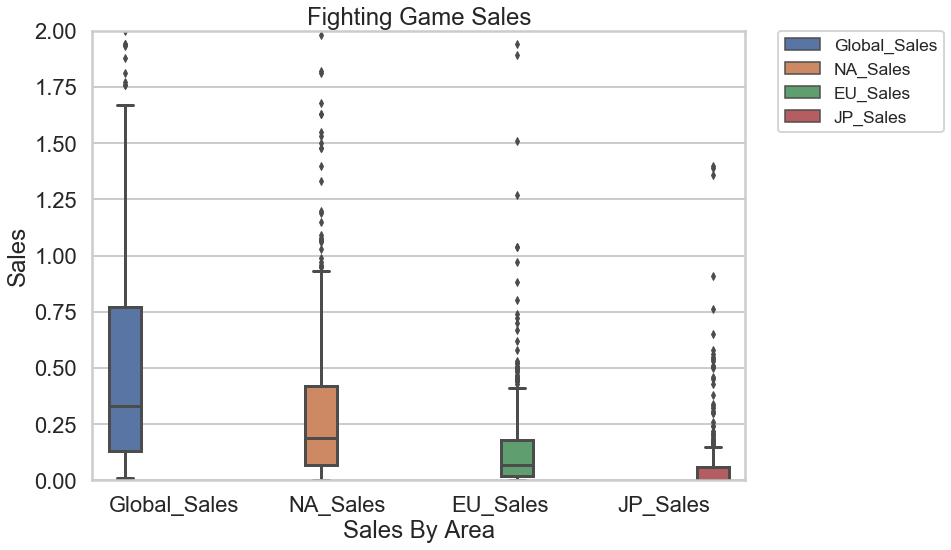

In [18]:
# Boxplot of Fighting Game Sales
df_fighter = pd.melt(df, id_vars='Fighter', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_fighter = df_fighter[df_fighter['Fighter'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_fighter, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fighting Game Sales')

** Because of how low the p-values are for Global and European sales, we can reject the null hypothesis and say Fighting games sell differently in those areas compared to Non-Fighting games. In both areas, they sell worse.**

In [19]:
# Running a t-test for Simulation Games and Global Sales
print('Average amount of Simulation Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Simulation']['Global_Sales'].mean()))
print('Average amount of Non-Simulation Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Simulation']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Simulation']['Global_Sales'], df.loc[df['Genre'] != 'Simulation']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Simulation Games and North American Sales
print('Average amount of Simulation Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Simulation']['NA_Sales'].mean()))
print('Average amount of Non-Simulation Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Simulation']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Simulation']['NA_Sales'], df.loc[df['Genre'] != 'Simulation']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Simulation Games and European Sales
print('Average amount of Simulation Games in European Sales: ' + str(df.loc[df['Genre'] == 'Simulation']['EU_Sales'].mean()))
print('Average amount of Non-Simulation Games in European Sales: ' + str(df.loc[df['Genre'] != 'Simulation']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Simulation']['EU_Sales'], df.loc[df['Genre'] != 'Simulation']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Simulation Games and Japanese Sales
print('Average amount of Simulation Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Simulation']['JP_Sales'].mean()))
print('Average amount of Non-Simulation Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Simulation']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Simulation']['JP_Sales'], df.loc[df['Genre'] != 'Simulation']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Simulation Games in Global Sales: 0.682491582492
Average amount of Non-Simulation Games in Global Sales: 0.781916360294
Global t-statistic: -1.30762934311
Global p-value: 0.191812627385


Average amount of Simulation Games in North American Sales: 0.310168350168
Average amount of Non-Simulation Games in North American Sales: 0.398319546569
North American t-statistic: -2.98300861431
North American p-value: 0.00301725741855


Average amount of Simulation Games in European Sales: 0.226565656566
Average amount of Non-Simulation Games in European Sales: 0.236522671569
European t-statistic: -0.309713709227
European p-value: 0.756966697752


Average amount of Simulation Games in Japanese Sales: 0.0880808080808
Average amount of Non-Simulation Games in Japanese Sales: 0.0630698529412
Japanese t-statistic: 0.982579676517
Japanese p-value: 0.326587550339


Text(0.5,1,'Simulation Game Sales')

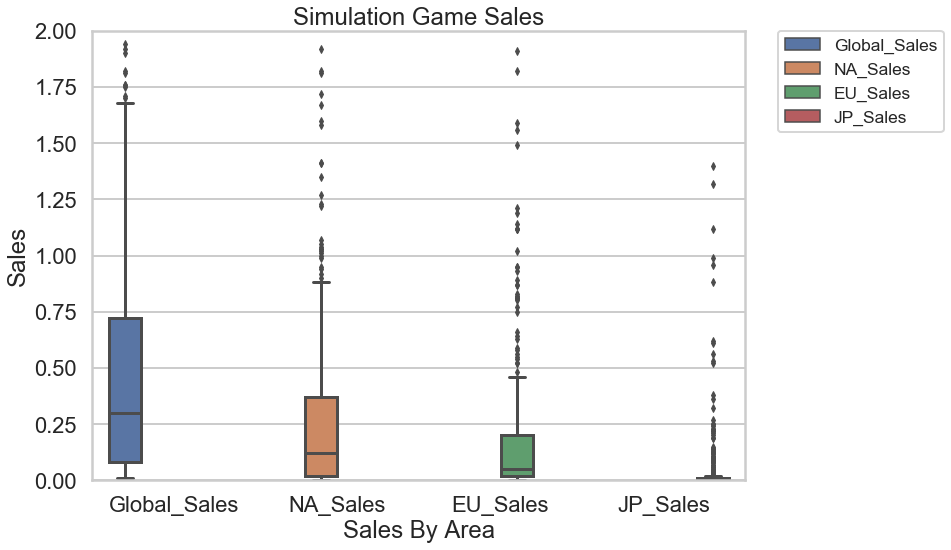

In [20]:
# Boxplot of Simulation Game Sales
df_simulation = pd.melt(df, id_vars='Simulation', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_simulation = df_simulation[df_simulation['Simulation'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_simulation, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Simulation Game Sales')

** Because of how low the p-value is for North American sales, we can reject the null hypothesis and say Simulation games sell differently in that area compared to Non-Simulation games. In North America, they sell worse.**

In [21]:
# Running a t-test for Role-Playing Games and Global Sales
print('Average amount of Role-Playing Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Role-Playing']['Global_Sales'].mean()))
print('Average amount of Non-Role-Playing Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Role-Playing']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Role-Playing']['Global_Sales'], df.loc[df['Genre'] != 'Role-Playing']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Role-Playing Games and North American Sales
print('Average amount of Role-Playing Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Role-Playing']['NA_Sales'].mean()))
print('Average amount of Non-Role-Playing Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Role-Playing']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Role-Playing']['NA_Sales'], df.loc[df['Genre'] != 'Role-Playing']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Role-Playing Games and European Sales
print('Average amount of Role-Playing Games in European Sales: ' + str(df.loc[df['Genre'] == 'Role-Playing']['EU_Sales'].mean()))
print('Average amount of Non-Role-Playing Games in European Sales: ' + str(df.loc[df['Genre'] != 'Role-Playing']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Role-Playing']['EU_Sales'], df.loc[df['Genre'] != 'Role-Playing']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Role-Playing Games and Japanese Sales
print('Average amount of Role-Playing Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Role-Playing']['JP_Sales'].mean()))
print('Average amount of Non-Role-Playing Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Role-Playing']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Role-Playing']['JP_Sales'], df.loc[df['Genre'] != 'Role-Playing']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Role-Playing Games in Global Sales: 0.704171348315
Average amount of Non-Role-Playing Games in Global Sales: 0.78614101096
Global t-statistic: -1.54556079031
Global p-value: 0.122470701487


Average amount of Role-Playing Games in North American Sales: 0.308328651685
Average amount of Non-Role-Playing Games in North American Sales: 0.404518239817
North American t-statistic: -3.92844304164
North American p-value: 8.98860989383e-05


Average amount of Role-Playing Games in European Sales: 0.167415730337
Average amount of Non-Role-Playing Games in European Sales: 0.244088009161
European t-statistic: -4.27000023515
European p-value: 2.10014401186e-05


Average amount of Role-Playing Games in Japanese Sales: 0.172008426966
Average amount of Non-Role-Playing Games in Japanese Sales: 0.0515965974153
Japanese t-statistic: 6.96792242142
Japanese p-value: 6.93791204795e-12


Text(0.5,1,'Role-Playing Game Sales')

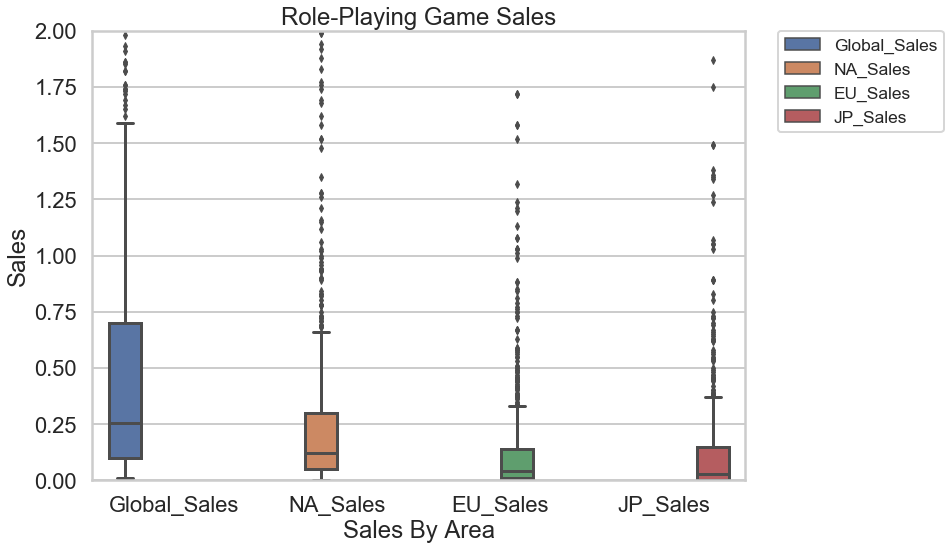

In [22]:
# Boxplot of Role-Playing Game Sales
df_rpg = pd.melt(df, id_vars='RPG', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_rpg = df_rpg[df_rpg['RPG'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_rpg, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Role-Playing Game Sales')

** Because of how low the p-values are for all regional sales, we can reject the null hypothesis and say Role-Playing games sell differently in those areas compared to Non-Role-Playing games. In Japan, they sell better while in North America and Europe, they sell worse.**

In [23]:
# Running a t-test for Adventure Games and Global Sales
print('Average amount of Adventure Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Adventure']['Global_Sales'].mean()))
print('Average amount of Non-Adventure Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Adventure']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Adventure']['Global_Sales'], df.loc[df['Genre'] != 'Adventure']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Adventure Games and North American Sales
print('Average amount of Adventure Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Adventure']['NA_Sales'].mean()))
print('Average amount of Non-Adventure Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Adventure']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Adventure']['NA_Sales'], df.loc[df['Genre'] != 'Adventure']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Adventure Games and European Sales
print('Average amount of Adventure Games in European Sales: ' + str(df.loc[df['Genre'] == 'Adventure']['EU_Sales'].mean()))
print('Average amount of Non-Adventure Games in European Sales: ' + str(df.loc[df['Genre'] != 'Adventure']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Adventure']['EU_Sales'], df.loc[df['Genre'] != 'Adventure']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Adventure Games and Japanese Sales
print('Average amount of Adventure Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Adventure']['JP_Sales'].mean()))
print('Average amount of Non-Adventure Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Adventure']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Adventure']['JP_Sales'], df.loc[df['Genre'] != 'Adventure']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Adventure Games in Global Sales: 0.32560483871
Average amount of Non-Adventure Games in Global Sales: 0.794632811312
Global t-statistic: -10.0380922121
Global p-value: 1.30024223122e-21


Average amount of Adventure Games in North American Sales: 0.156491935484
Average amount of Non-Adventure Games in North American Sales: 0.403457503421
North American t-statistic: -10.8237007364
North American p-value: 1.46850438616e-24


Average amount of Adventure Games in European Sales: 0.101048387097
Average amount of Non-Adventure Games in European Sales: 0.241181389691
European t-statistic: -8.25766868507
European p-value: 1.70259029746e-15


Average amount of Adventure Games in Japanese Sales: 0.0352016129032
Average amount of Non-Adventure Games in Japanese Sales: 0.0652501140338
Japanese t-statistic: -3.66020575829
Japanese p-value: 0.000287867326836


Text(0.5,1,'Adventure Game Sales')

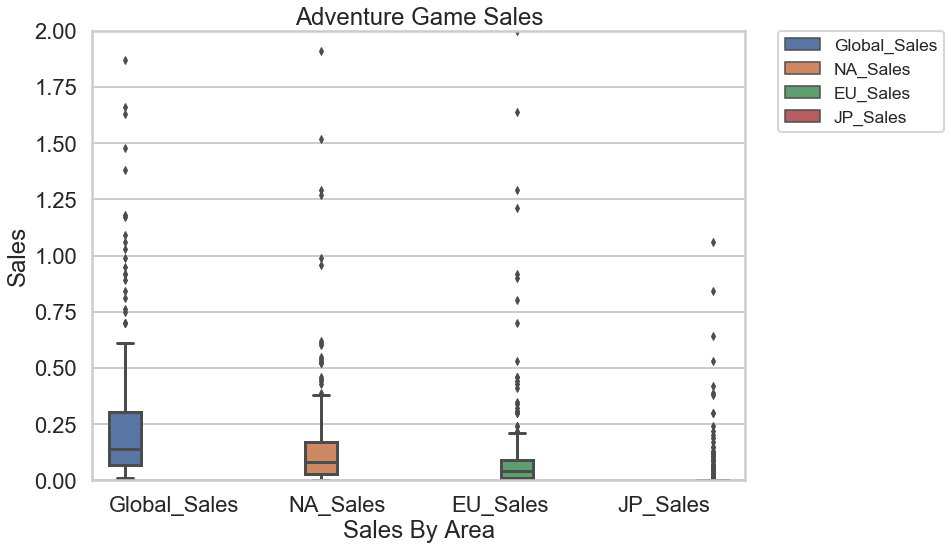

In [24]:
# Boxplot of Adventure Game Sales
df_adventure = pd.melt(df, id_vars='Adventure', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_adventure = df_adventure[df_adventure['Adventure'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_adventure, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Adventure Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Adventure games sell differently in those areas compared to Non-Adventure games. In all areas, they sell worse.**

In [25]:
# Running a t-test for Strategy Games and Global Sales
print('Average amount of Strategy Games in Global Sales: ' + str(df.loc[df['Genre'] == 'Strategy']['Global_Sales'].mean()))
print('Average amount of Non-Strategy Games in Global Sales: ' + str(df.loc[df['Genre'] != 'Strategy']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Strategy']['Global_Sales'], df.loc[df['Genre'] != 'Strategy']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Strategy Games and North American Sales
print('Average amount of Strategy Games in North American Sales: ' + str(df.loc[df['Genre'] == 'Strategy']['NA_Sales'].mean()))
print('Average amount of Non-Strategy Games in North American Sales: ' + str(df.loc[df['Genre'] != 'Strategy']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Strategy']['NA_Sales'], df.loc[df['Genre'] != 'Strategy']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Strategy Games and European Sales
print('Average amount of Strategy Games in European Sales: ' + str(df.loc[df['Genre'] == 'Strategy']['EU_Sales'].mean()))
print('Average amount of Non-Strategy Games in European Sales: ' + str(df.loc[df['Genre'] != 'Strategy']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Strategy']['EU_Sales'], df.loc[df['Genre'] != 'Strategy']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Strategy Games and Japanese Sales
print('Average amount of Strategy Games in Japanese Sales: ' + str(df.loc[df['Genre'] == 'Strategy']['JP_Sales'].mean()))
print('Average amount of Non-Strategy Games in Japanese Sales: ' + str(df.loc[df['Genre'] != 'Strategy']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Genre'] == 'Strategy']['JP_Sales'], df.loc[df['Genre'] != 'Strategy']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Strategy Games in Global Sales: 0.260711610487
Average amount of Non-Strategy Games in Global Sales: 0.798633729796
Global t-statistic: -14.4110565888
Global p-value: 3.96000383167e-42


Average amount of Strategy Games in North American Sales: 0.124531835206
Average amount of Non-Strategy Games in North American Sales: 0.405474229948
North American t-statistic: -14.1513460932
North American p-value: 5.70332498227e-40


Average amount of Strategy Games in European Sales: 0.0944194756554
Average amount of Non-Strategy Games in European Sales: 0.241857273559
European t-statistic: -10.2300474387
European p-value: 7.47350371689e-23


Average amount of Strategy Games in Japanese Sales: 0.0162546816479
Average amount of Non-Strategy Games in Japanese Sales: 0.0661085696859
Japanese t-statistic: -9.01789342863
Japanese p-value: 1.41203442902e-18


Text(0.5,1,'Strategy Game Sales')

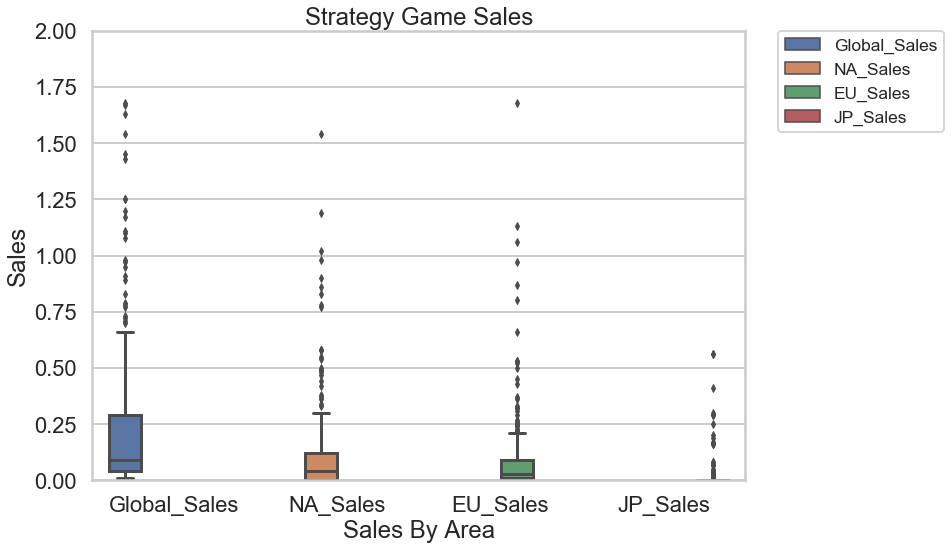

In [26]:
# Boxplot of Strategy Game Sales
df_strategy = pd.melt(df, id_vars='Strategy', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_strategy = df_strategy[df_strategy['Strategy'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_strategy, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Strategy Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Strategy games sell differently in those areas compared to Non-Strategy games. In all areas, they sell worse.**

In [27]:
# Running a t-test for Wii Games and Global Sales
print('Average amount of Wii Games in Global Sales: ' + str(df.loc[df['Platform'] == 'Wii']['Global_Sales'].mean()))
print('Average amount of Non-Wii Games in Global Sales: ' + str(df.loc[df['Platform'] != 'Wii']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'Wii']['Global_Sales'], df.loc[df['Platform'] != 'Wii']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Wii Games and North American Sales
print('Average amount of Wii Games in North American Sales: ' + str(df.loc[df['Platform'] == 'Wii']['NA_Sales'].mean()))
print('Average amount of Non-Wii Games in North American Sales: ' + str(df.loc[df['Platform'] != 'Wii']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'Wii']['NA_Sales'], df.loc[df['Platform'] != 'Wii']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Wii Games and European Sales
print('Average amount of Wii Games in European Sales: ' + str(df.loc[df['Platform'] == 'Wii']['EU_Sales'].mean()))
print('Average amount of Non-Wii Games in European Sales: ' + str(df.loc[df['Platform'] != 'Wii']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'Wii']['EU_Sales'], df.loc[df['Platform'] != 'Wii']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Wii Games and Japanese Sales
print('Average amount of Wii Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'Wii']['JP_Sales'].mean()))
print('Average amount of Non-Wii Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'Wii']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'Wii']['JP_Sales'], df.loc[df['Platform'] != 'Wii']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Wii Games in Global Sales: 1.37574112735
Average amount of Non-Wii Games in Global Sales: 0.732440907658
Global t-statistic: 2.77031622966
Global p-value: 0.005815469795


Average amount of Wii Games in North American Sales: 0.715887265136
Average amount of Non-Wii Games in North American Sales: 0.370223763
North American t-statistic: 3.05405503075
North American p-value: 0.00238202221769


Average amount of Wii Games in European Sales: 0.426158663883
Average amount of Non-Wii Games in European Sales: 0.221742830129
European t-statistic: 2.56765295581
European p-value: 0.0105376974667


Average amount of Wii Games in Japanese Sales: 0.109331941545
Average amount of Non-Wii Games in Japanese Sales: 0.060748502994
Japanese t-statistic: 2.18025645862
Japanese p-value: 0.0297037066106


Text(0.5,1,'Nintendo Wii Game Sales')

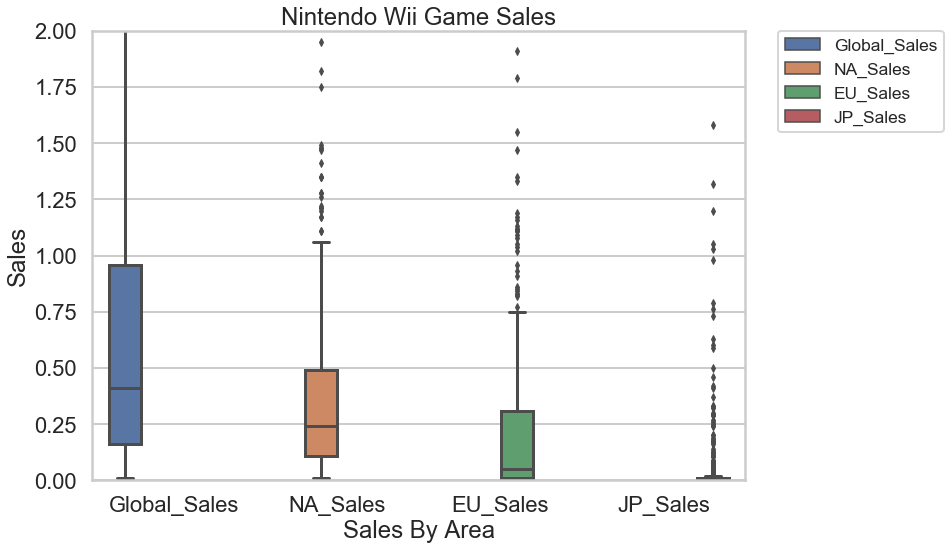

In [28]:
# Boxplot of Nintendo Wii Game Sales
df_wii = pd.melt(df, id_vars='Nintendo Wii', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_wii = df_wii[df_wii['Nintendo Wii'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_wii, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nintendo Wii Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Nintendo Wii games sell differently in those areas compared to Non-Nintendo Wii games. In all areas, they sell better.**

In [29]:
# Running a t-test for DS Games and Global Sales
print('Average amount of DS Games in Global Sales: ' + str(df.loc[df['Platform'] == 'DS']['Global_Sales'].mean()))
print('Average amount of Non-DS Games in Global Sales: ' + str(df.loc[df['Platform'] != 'DS']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DS']['Global_Sales'], df.loc[df['Platform'] != 'DS']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for DS Games and North American Sales
print('Average amount of DS Games in North American Sales: ' + str(df.loc[df['Platform'] == 'DS']['NA_Sales'].mean()))
print('Average amount of Non-DS Games in North American Sales: ' + str(df.loc[df['Platform'] != 'DS']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DS']['NA_Sales'], df.loc[df['Platform'] != 'DS']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for DS Games and European Sales
print('Average amount of DS Games in European Sales: ' + str(df.loc[df['Platform'] == 'DS']['EU_Sales'].mean()))
print('Average amount of Non-DS Games in European Sales: ' + str(df.loc[df['Platform'] != 'DS']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DS']['EU_Sales'], df.loc[df['Platform'] != 'DS']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for DS Games and Japanese Sales
print('Average amount of DS Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'DS']['JP_Sales'].mean()))
print('Average amount of Non-DS Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'DS']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DS']['JP_Sales'], df.loc[df['Platform'] != 'DS']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of DS Games in Global Sales: 0.823987068966
Average amount of Non-DS Games in Global Sales: 0.77420531363
Global t-statistic: 0.443619227926
Global p-value: 0.657506318782


Average amount of DS Games in North American Sales: 0.373706896552
Average amount of Non-DS Games in North American Sales: 0.395999056752
North American t-statistic: -0.540259760087
North American p-value: 0.589234189161


Average amount of DS Games in European Sales: 0.205387931034
Average amount of Non-DS Games in European Sales: 0.238328879107
European t-statistic: -0.841650702469
European p-value: 0.400378240111


Average amount of DS Games in Japanese Sales: 0.180301724138
Average amount of Non-DS Games in Japanese Sales: 0.0556862128596
Japanese t-statistic: 4.19628472791
Japanese p-value: 3.24169344564e-05


Text(0.5,1,'Nintendo DS Game Sales')

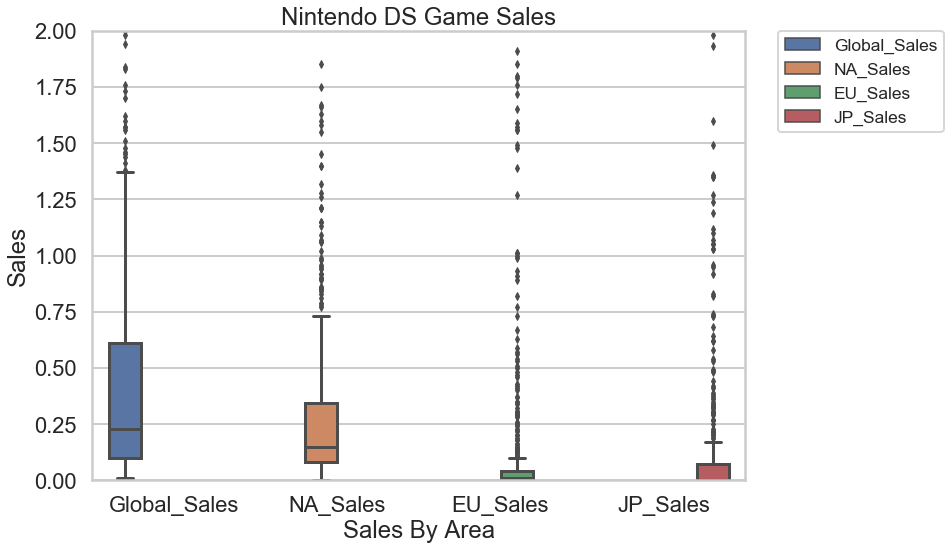

In [30]:
# Boxplot of Nintendo DS Game Sales
df_ds = pd.melt(df, id_vars='Nintendo DS', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_ds = df_ds[df_ds['Nintendo DS'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_ds, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nintendo DS Game Sales')

** Because of how low the p-value is for Japanese sales, we can reject the null hypothesis and say Nintendo DS games sell differently in that area compared to Non-Nintendo DS games. In Japan, they sell better.**

In [31]:
# Running a t-test for Xbox 360 Games and Global Sales
print('Average amount of Xbox 360 Games in Global Sales: ' + str(df.loc[df['Platform'] == 'X360']['Global_Sales'].mean()))
print('Average amount of Non-Xbox 360 Games in Global Sales: ' + str(df.loc[df['Platform'] != 'X360']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'X360']['Global_Sales'], df.loc[df['Platform'] != 'X360']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox 360 Games and North American Sales
print('Average amount of Xbox 360 Games in North American Sales: ' + str(df.loc[df['Platform'] == 'X360']['NA_Sales'].mean()))
print('Average amount of Non-Xbox 360 Games in North American Sales: ' + str(df.loc[df['Platform'] != 'X360']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'X360']['NA_Sales'], df.loc[df['Platform'] != 'X360']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox 360 Games and European Sales
print('Average amount of Xbox 360 Games in European Sales: ' + str(df.loc[df['Platform'] == 'X360']['EU_Sales'].mean()))
print('Average amount of Non-Xbox 360 Games in European Sales: ' + str(df.loc[df['Platform'] != 'X360']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'X360']['EU_Sales'], df.loc[df['Platform'] != 'X360']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox 360 Games and Japanese Sales
print('Average amount of Xbox 360 Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'X360']['JP_Sales'].mean()))
print('Average amount of Non-Xbox 360 Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'X360']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'X360']['JP_Sales'], df.loc[df['Platform'] != 'X360']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Xbox 360 Games in Global Sales: 0.994522144522
Average amount of Non-Xbox 360 Games in Global Sales: 0.746396849338
Global t-statistic: 3.61543741012
Global p-value: 0.000312807472291


Average amount of Xbox 360 Games in North American Sales: 0.621713286713
Average amount of Non-Xbox 360 Games in North American Sales: 0.361809954751
North American t-statistic: 6.09171732392
North American p-value: 1.58679301297e-09


Average amount of Xbox 360 Games in European Sales: 0.273111888112
Average amount of Non-Xbox 360 Games in European Sales: 0.230765879001
European t-statistic: 2.06140983345
European p-value: 0.0394593122616


Average amount of Xbox 360 Games in Japanese Sales: 0.0117599067599
Average amount of Non-Xbox 360 Games in Japanese Sales: 0.0716926428691
Japanese t-statistic: -14.679528777
Japanese p-value: 5.05473259867e-48


Text(0.5,1,'Xbox 360 Game Sales')

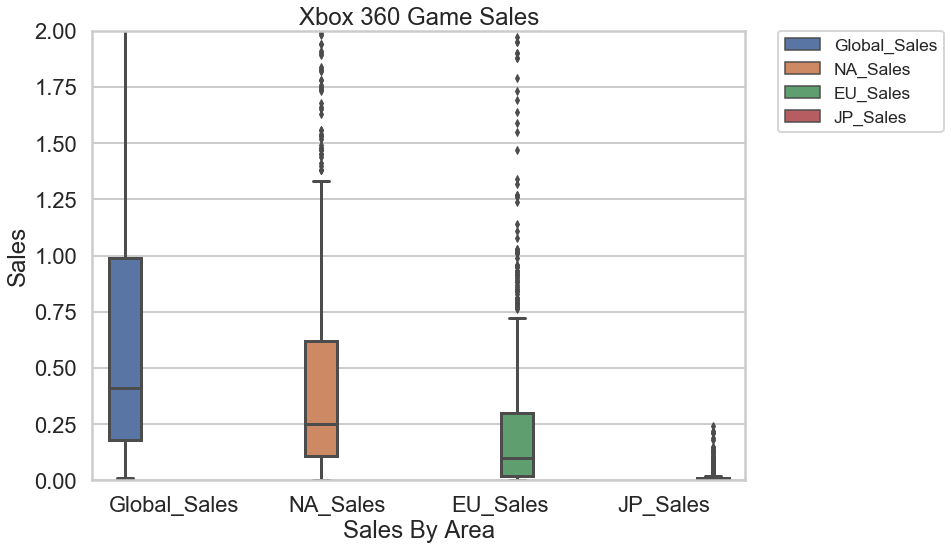

In [32]:
# Boxplot of Xbox 360 Game Sales
df_x360 = pd.melt(df, id_vars='Xbox 360', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_x360 = df_x360[df_x360['Xbox 360'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_x360, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Xbox 360 Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Xbox 360 games sell differently in those areas compared to Non-Xbox 360 games. In all areas except Japan, they sell better while in Japan they sell worse.**

In [33]:
# Running a t-test for PS3 Games and Global Sales
print('Average amount of PS3 Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PS3']['Global_Sales'].mean()))
print('Average amount of Non-PS3 Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PS3']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS3']['Global_Sales'], df.loc[df['Platform'] != 'PS3']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PS3 Games and North American Sales
print('Average amount of PS3 Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PS3']['NA_Sales'].mean()))
print('Average amount of Non-PS3 Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PS3']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS3']['NA_Sales'], df.loc[df['Platform'] != 'PS3']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PS3 Games and European Sales
print('Average amount of PS3 Games in European Sales: ' + str(df.loc[df['Platform'] == 'PS3']['EU_Sales'].mean()))
print('Average amount of Non-PS3 Games in European Sales: ' + str(df.loc[df['Platform'] != 'PS3']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS3']['EU_Sales'], df.loc[df['Platform'] != 'PS3']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PS3 Games and Japanese Sales
print('Average amount of PS3 Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PS3']['JP_Sales'].mean()))
print('Average amount of Non-PS3 Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PS3']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS3']['JP_Sales'], df.loc[df['Platform'] != 'PS3']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PS3 Games in Global Sales: 1.01989596879
Average amount of Non-PS3 Games in Global Sales: 0.746821334214
Global t-statistic: 4.11185137884
Global p-value: 4.22975028501e-05


Average amount of PS3 Games in North American Sales: 0.444239271782
Average amount of Non-PS3 Games in North American Sales: 0.388165455746
North American t-statistic: 1.96646244386
North American p-value: 0.0494765354245


Average amount of PS3 Games in European Sales: 0.355656697009
Average amount of Non-PS3 Games in European Sales: 0.22090653897
European t-statistic: 4.98075766262
European p-value: 7.51126525787e-07


Average amount of PS3 Games in Japanese Sales: 0.0708972691808
Average amount of Non-PS3 Games in Japanese Sales: 0.0633025099075
Japanese t-statistic: 1.11040765889
Japanese p-value: 0.266989548401


Text(0.5,1,'PlayStation 3 Game Sales')

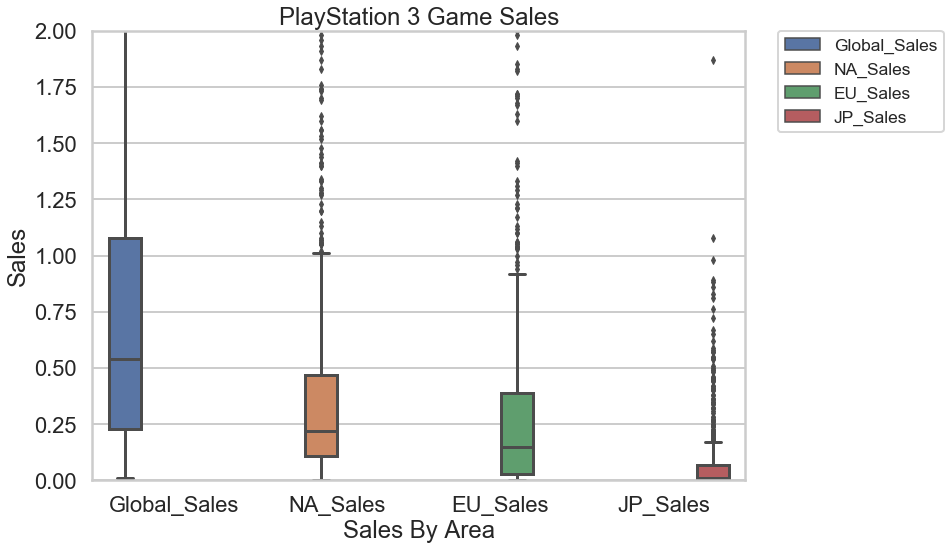

In [34]:
# Boxplot of PlayStation 3 Game Sales
df_ps3 = pd.melt(df, id_vars='PlayStation 3', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_ps3 = df_ps3[df_ps3['PlayStation 3'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_ps3, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PlayStation 3 Game Sales')

** Because of how low the p-values are for Global as well as North American and European sales, we can reject the null hypothesis and say PS3 games sell differently in those areas compared to Non-PS3 games. In those areas, they sell better.**

In [35]:
# Running a t-test for PS2 Games and Global Sales
print('Average amount of PS2 Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PS2']['Global_Sales'].mean()))
print('Average amount of Non-PS2 Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PS2']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS2']['Global_Sales'], df.loc[df['Platform'] != 'PS2']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PS2 Games and North American Sales
print('Average amount of PS2 Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PS2']['NA_Sales'].mean()))
print('Average amount of Non-PS2 Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PS2']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS2']['NA_Sales'], df.loc[df['Platform'] != 'PS2']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PS2 Games and European Sales
print('Average amount of PS2 Games in European Sales: ' + str(df.loc[df['Platform'] == 'PS2']['EU_Sales'].mean()))
print('Average amount of Non-PS2 Games in European Sales: ' + str(df.loc[df['Platform'] != 'PS2']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS2']['EU_Sales'], df.loc[df['Platform'] != 'PS2']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PS2 Games and Japanese Sales
print('Average amount of PS2 Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PS2']['JP_Sales'].mean()))
print('Average amount of Non-PS2 Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PS2']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS2']['JP_Sales'], df.loc[df['Platform'] != 'PS2']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PS2 Games in Global Sales: 0.829798245614
Average amount of Non-PS2 Games in Global Sales: 0.767120492524
Global t-statistic: 1.24059825739
Global p-value: 0.214887172274


Average amount of PS2 Games in North American Sales: 0.414605263158
Average amount of Non-PS2 Games in North American Sales: 0.390448548813
North American t-statistic: 0.953930340708
North American p-value: 0.340227235521


Average amount of PS2 Games in European Sales: 0.223807017544
Average amount of Non-PS2 Games in European Sales: 0.238552330695
European t-statistic: -0.909427848246
European p-value: 0.363209569222


Average amount of PS2 Games in Japanese Sales: 0.0665
Average amount of Non-PS2 Games in Japanese Sales: 0.0636886543536
Japanese t-statistic: 0.345088348513
Japanese p-value: 0.730066196418


Text(0.5,1,'PlayStation 2 Game Sales')

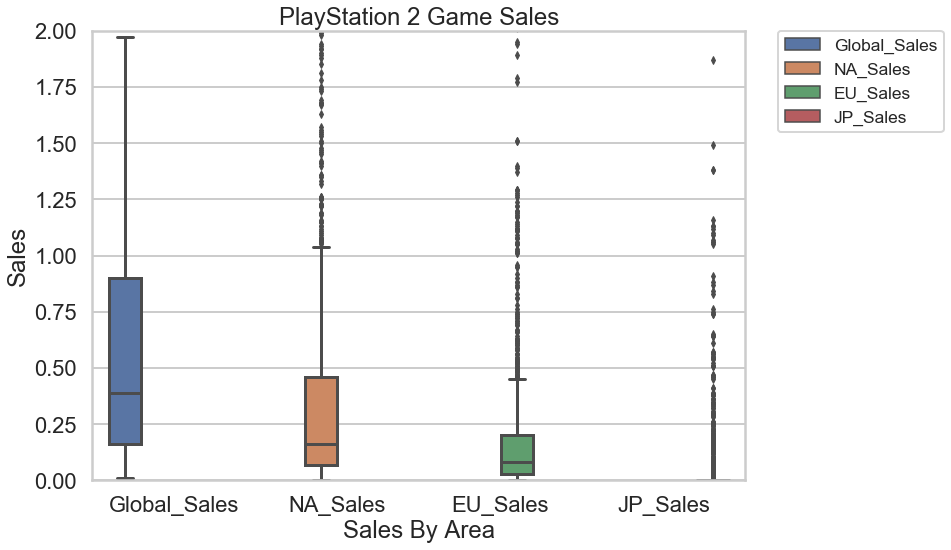

In [36]:
# Boxplot of PlayStation 2 Game Sales
df_ps2 = pd.melt(df, id_vars='PlayStation 2', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_ps2 = df_ps2[df_ps2['PlayStation 2'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_ps2, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PlayStation 2 Game Sales')

** Because of how high the p-values are for Global and all regional sales, we cannot reject the null hypothesis. Therefore, PS2 games do not sell better or worse in any area.**

In [37]:
# Running a t-test for 3DS Games and Global Sales
print('Average amount of 3DS Games in Global Sales: ' + str(df.loc[df['Platform'] == '3DS']['Global_Sales'].mean()))
print('Average amount of Non-3DS Games in Global Sales: ' + str(df.loc[df['Platform'] != '3DS']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == '3DS']['Global_Sales'], df.loc[df['Platform'] != '3DS']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for 3DS Games and North American Sales
print('Average amount of 3DS Games in North American Sales: ' + str(df.loc[df['Platform'] == '3DS']['NA_Sales'].mean()))
print('Average amount of Non-3DS Games in North American Sales: ' + str(df.loc[df['Platform'] != '3DS']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == '3DS']['NA_Sales'], df.loc[df['Platform'] != '3DS']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for 3DS Games and European Sales
print('Average amount of 3DS Games in European Sales: ' + str(df.loc[df['Platform'] == '3DS']['EU_Sales'].mean()))
print('Average amount of Non-3DS Games in European Sales: ' + str(df.loc[df['Platform'] != '3DS']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == '3DS']['EU_Sales'], df.loc[df['Platform'] != '3DS']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for 3DS Games and Japanese Sales
print('Average amount of 3DS Games in Japanese Sales: ' + str(df.loc[df['Platform'] == '3DS']['JP_Sales'].mean()))
print('Average amount of Non-3DS Games in Japanese Sales: ' + str(df.loc[df['Platform'] != '3DS']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == '3DS']['JP_Sales'], df.loc[df['Platform'] != '3DS']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of 3DS Games in Global Sales: 0.795032258065
Average amount of Non-3DS Games in Global Sales: 0.777184407796
Global t-statistic: 0.124510723939
Global p-value: 0.90106424784


Average amount of 3DS Games in North American Sales: 0.314
Average amount of Non-3DS Games in North American Sales: 0.396353823088
North American t-statistic: -1.49362127883
North American p-value: 0.137134350127


Average amount of 3DS Games in European Sales: 0.215032258065
Average amount of Non-3DS Games in European Sales: 0.236578710645
European t-statistic: -0.501202904518
European p-value: 0.616889757886


Average amount of 3DS Games in Japanese Sales: 0.216580645161
Average amount of Non-3DS Games in Japanese Sales: 0.060616191904
Japanese t-statistic: 3.56193065624
Japanese p-value: 0.000488614562306


Text(0.5,1,'Nintendo 3DS Game Sales')

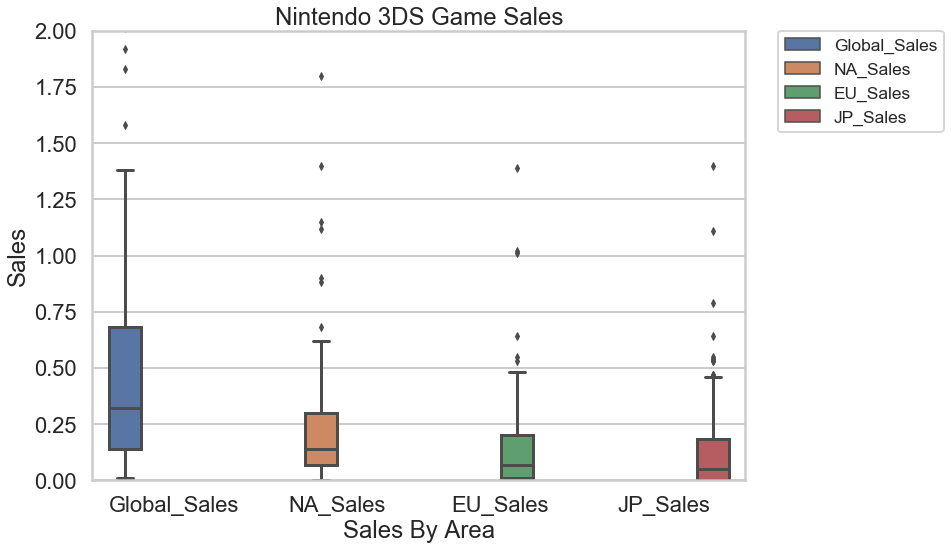

In [38]:
# Boxplot of Nintendo 3DS Game Sales
df_3ds = pd.melt(df, id_vars='Nintendo 3DS', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_3ds = df_3ds[df_3ds['Nintendo 3DS'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_3ds, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nintendo 3DS Game Sales')

** Because of how low the p-value is for Japanese sales, we can reject the null hypothesis and say Nintendo 3DS games sell differently in that area compared to Non-Nintendo 3DS games. In Japan, they sell better.**

In [39]:
# Running a t-test for PS4 Games and Global Sales
print('Average amount of PS4 Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PS4']['Global_Sales'].mean()))
print('Average amount of Non-PS4 Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PS4']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS4']['Global_Sales'], df.loc[df['Platform'] != 'PS4']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PS4 Games and North American Sales
print('Average amount of PS4 Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PS4']['NA_Sales'].mean()))
print('Average amount of Non-PS4 Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PS4']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS4']['NA_Sales'], df.loc[df['Platform'] != 'PS4']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PS4 Games and European Sales
print('Average amount of PS4 Games in European Sales: ' + str(df.loc[df['Platform'] == 'PS4']['EU_Sales'].mean()))
print('Average amount of Non-PS4 Games in European Sales: ' + str(df.loc[df['Platform'] != 'PS4']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS4']['EU_Sales'], df.loc[df['Platform'] != 'PS4']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PS4 Games and Japanese Sales
print('Average amount of PS4 Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PS4']['JP_Sales'].mean()))
print('Average amount of Non-PS4 Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PS4']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS4']['JP_Sales'], df.loc[df['Platform'] != 'PS4']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PS4 Games in Global Sales: 1.01686192469
Average amount of Non-PS4 Games in Global Sales: 0.76890677194
Global t-statistic: 2.23969598629
Global p-value: 0.0259475092053


Average amount of PS4 Games in North American Sales: 0.352133891213
Average amount of Non-PS4 Games in North American Sales: 0.396020346189
North American t-statistic: -1.12270699609
North American p-value: 0.262488714237


Average amount of PS4 Games in European Sales: 0.46769874477
Average amount of Non-PS4 Games in European Sales: 0.227684482235
European t-statistic: 4.08040985631
European p-value: 6.06549821261e-05


Average amount of PS4 Games in Japanese Sales: 0.038870292887
Average amount of Non-PS4 Games in Japanese Sales: 0.0650759186152
Japanese t-statistic: -4.55486183529
Japanese p-value: 6.28671272683e-06


Text(0.5,1,'PlayStation 4 Game Sales')

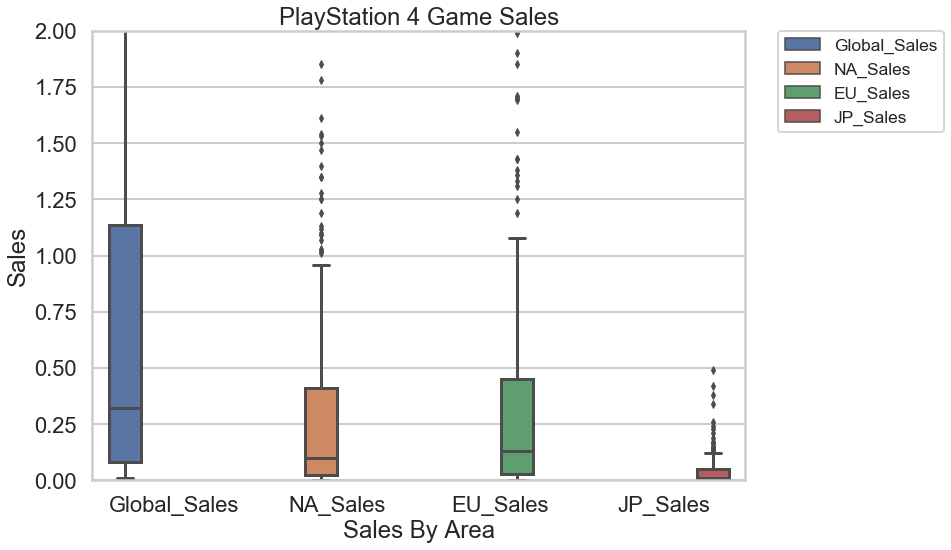

In [40]:
# Boxplot of PlayStation 4 Game Sales
df_ps4 = pd.melt(df, id_vars='PlayStation 4', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_ps4 = df_ps4[df_ps4['PlayStation 4'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_ps4, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PlayStation 4 Game Sales')

** Because of how low the p-values are for Global as well as European and Japanese sales, we can reject the null hypothesis and say PS4 games sell differently in those areas compared to Non-PS4 games. Globally and in Europe, they sell better while in Japan they sell worse.**

In [41]:
# Running a t-test for PlayStation Games and Global Sales
print('Average amount of PlayStation Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PS']['Global_Sales'].mean()))
print('Average amount of Non-PlayStation Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PS']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS']['Global_Sales'], df.loc[df['Platform'] != 'PS']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Games and North American Sales
print('Average amount of PlayStation Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PS']['NA_Sales'].mean()))
print('Average amount of Non-PlayStation Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PS']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS']['NA_Sales'], df.loc[df['Platform'] != 'PS']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Games and European Sales
print('Average amount of PlayStation Games in European Sales: ' + str(df.loc[df['Platform'] == 'PS']['EU_Sales'].mean()))
print('Average amount of Non-PlayStation Games in European Sales: ' + str(df.loc[df['Platform'] != 'PS']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS']['EU_Sales'], df.loc[df['Platform'] != 'PS']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Games and Japanese Sales
print('Average amount of PlayStation Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PS']['JP_Sales'].mean()))
print('Average amount of Non-PlayStation Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PS']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PS']['JP_Sales'], df.loc[df['Platform'] != 'PS']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PlayStation Games in Global Sales: 1.377
Average amount of Non-PlayStation Games in Global Sales: 0.764119850187
Global t-statistic: 3.56797356393
Global p-value: 0.000479074333495


Average amount of PlayStation Games in North American Sales: 0.611733333333
Average amount of Non-PlayStation Games in North American Sales: 0.389601498127
North American t-statistic: 2.96789471024
North American p-value: 0.00346919074075


Average amount of PlayStation Games in European Sales: 0.430533333333
Average amount of Non-PlayStation Games in European Sales: 0.231719850187
European t-statistic: 3.45792395912
European p-value: 0.000702259186415


Average amount of PlayStation Games in Japanese Sales: 0.259
Average amount of Non-PlayStation Games in Japanese Sales: 0.0597797752809
Japanese t-statistic: 4.0486371342
Japanese p-value: 8.21962425908e-05


Text(0.5,1,'PlayStation Game Sales')

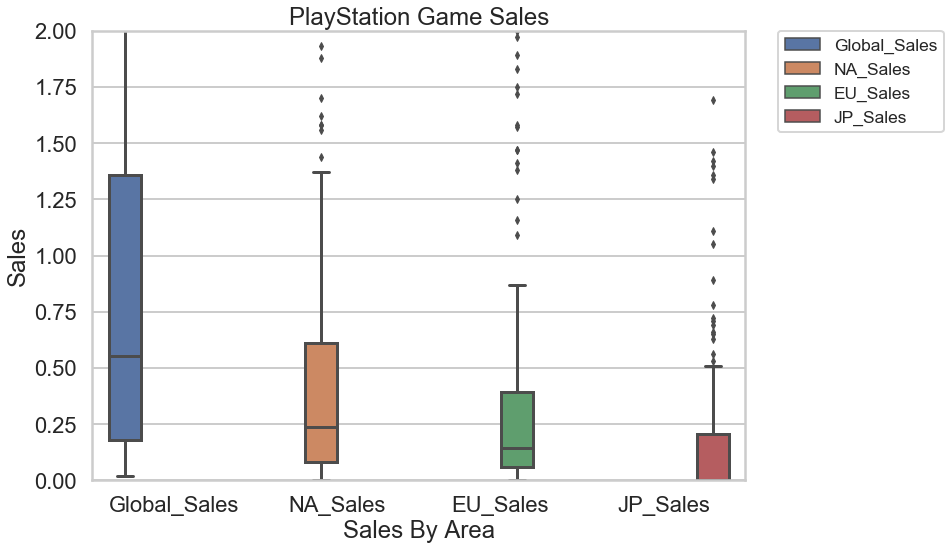

In [42]:
# Boxplot of PlayStation Game Sales
df_ps = pd.melt(df, id_vars='PlayStation', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_ps = df_ps[df_ps['PlayStation'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_ps, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PlayStation Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say PlayStation games sell differently in those areas compared to Non-PlayStation games. In all areas, they sell better.**

In [43]:
# Running a t-test for Xbox Games and Global Sales
print('Average amount of Xbox Games in Global Sales: ' + str(df.loc[df['Platform'] == 'XB']['Global_Sales'].mean()))
print('Average amount of Non-Xbox Games in Global Sales: ' + str(df.loc[df['Platform'] != 'XB']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XB']['Global_Sales'], df.loc[df['Platform'] != 'XB']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox Games and North American Sales
print('Average amount of Xbox Games in North American Sales: ' + str(df.loc[df['Platform'] == 'XB']['NA_Sales'].mean()))
print('Average amount of Non-Xbox Games in North American Sales: ' + str(df.loc[df['Platform'] != 'XB']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XB']['NA_Sales'], df.loc[df['Platform'] != 'XB']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox Games and European Sales
print('Average amount of Xbox Games in European Sales: ' + str(df.loc[df['Platform'] == 'XB']['EU_Sales'].mean()))
print('Average amount of Non-Xbox Games in European Sales: ' + str(df.loc[df['Platform'] != 'XB']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XB']['EU_Sales'], df.loc[df['Platform'] != 'XB']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox Games and Japanese Sales
print('Average amount of Xbox Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'XB']['JP_Sales'].mean()))
print('Average amount of Non-Xbox Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'XB']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XB']['JP_Sales'], df.loc[df['Platform'] != 'XB']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Xbox Games in Global Sales: 0.375345132743
Average amount of Non-Xbox Games in Global Sales: 0.81389456869
Global t-statistic: -12.108791291
Global p-value: 1.11892181303e-32


Average amount of Xbox Games in North American Sales: 0.271203539823
Average amount of Non-Xbox Games in North American Sales: 0.405610223642
North American t-statistic: -5.83373292872
North American p-value: 7.06257811813e-09


Average amount of Xbox Games in European Sales: 0.0889203539823
Average amount of Non-Xbox Games in European Sales: 0.249372204473
European t-statistic: -14.5919914676
European p-value: 5.56898928919e-47


Average amount of Xbox Games in Japanese Sales: 0.00212389380531
Average amount of Non-Xbox Games in Japanese Sales: 0.0697571884984
Japanese t-statistic: -17.6417834866
Japanese p-value: 4.38469385598e-68


Text(0.5,1,'Xbox Game Sales')

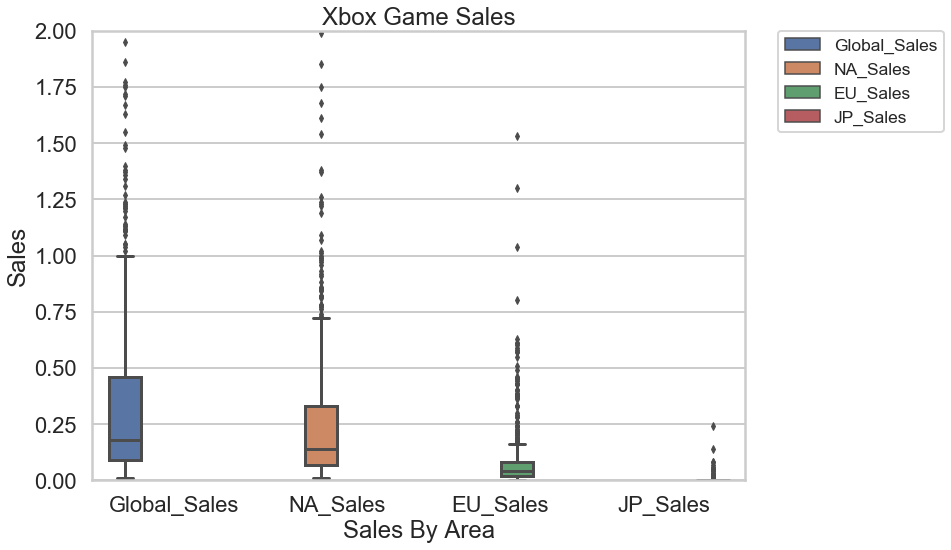

In [44]:
# Boxplot of Xbox Game Sales
df_x = pd.melt(df, id_vars='Xbox', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_x = df_x[df_x['Xbox'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_x, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Xbox Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Xbox games sell differently in those areas compared to Non-Xbox games. In all areas, they sell worse.**

In [45]:
# Running a t-test for PC Games and Global Sales
print('Average amount of PC Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PC']['Global_Sales'].mean()))
print('Average amount of Non-PC Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PC']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PC']['Global_Sales'], df.loc[df['Platform'] != 'PC']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PC Games and North American Sales
print('Average amount of PC Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PC']['NA_Sales'].mean()))
print('Average amount of Non-PC Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PC']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PC']['NA_Sales'], df.loc[df['Platform'] != 'PC']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PC Games and European Sales
print('Average amount of PC Games in European Sales: ' + str(df.loc[df['Platform'] == 'PC']['EU_Sales'].mean()))
print('Average amount of Non-PC Games in European Sales: ' + str(df.loc[df['Platform'] != 'PC']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PC']['EU_Sales'], df.loc[df['Platform'] != 'PC']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PC Games and Japanese Sales
print('Average amount of PC Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PC']['JP_Sales'].mean()))
print('Average amount of Non-PC Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PC']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PC']['JP_Sales'], df.loc[df['Platform'] != 'PC']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PC Games in Global Sales: 0.287434715822
Average amount of Non-PC Games in Global Sales: 0.829272756722
Global t-statistic: -14.3043383828
Global p-value: 2.09356887462e-44


Average amount of PC Games in North American Sales: 0.0979416282642
Average amount of Non-PC Games in North American Sales: 0.425751538711
North American t-statistic: -17.6561579664
North American p-value: 2.64831396932e-65


Average amount of PC Games in European Sales: 0.161013824885
Average amount of Non-PC Games in European Sales: 0.244005506965
European t-statistic: -4.26210996104
European p-value: 2.20815484558e-05


Average amount of PC Games in Japanese Sales: 0.00026113671275
Average amount of Non-PC Games in Japanese Sales: 0.07089569161
Japanese t-statistic: -18.3832524628
Japanese p-value: 1.56270176175e-73


Text(0.5,1,'PC Game Sales')

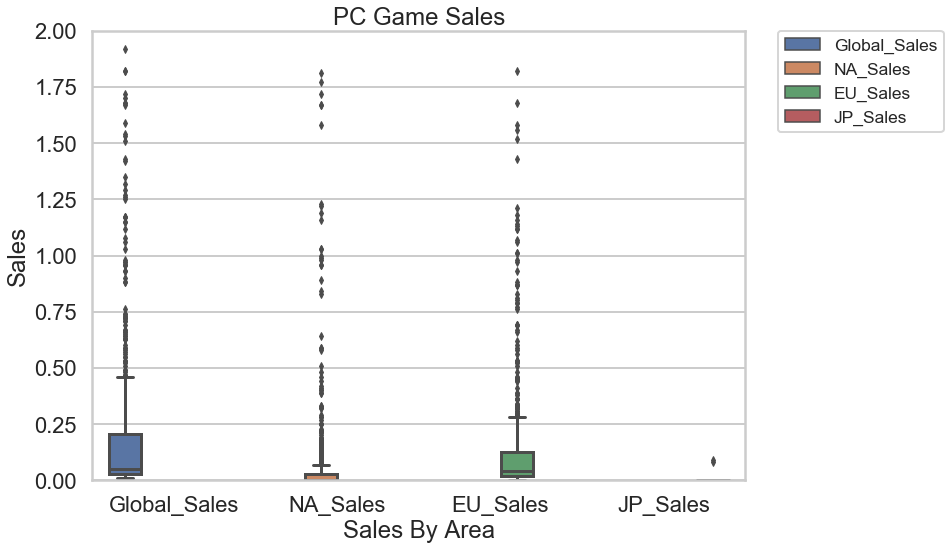

In [46]:
# Boxplot of PC Game Sales
df_pc = pd.melt(df, id_vars='PC', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_pc = df_pc[df_pc['PC'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_pc, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PC Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say PC games sell differently in those areas compared to Non-PC games. In all areas, they sell worse.**

In [47]:
# Running a t-test for PSP Games and Global Sales
print('Average amount of PSP Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PSP']['Global_Sales'].mean()))
print('Average amount of Non-PSP Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PSP']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSP']['Global_Sales'], df.loc[df['Platform'] != 'PSP']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PSP Games and North American Sales
print('Average amount of PSP Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PSP']['NA_Sales'].mean()))
print('Average amount of Non-PSP Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PSP']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSP']['NA_Sales'], df.loc[df['Platform'] != 'PSP']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PSP Games and European Sales
print('Average amount of PSP Games in European Sales: ' + str(df.loc[df['Platform'] == 'PSP']['EU_Sales'].mean()))
print('Average amount of Non-PSP Games in European Sales: ' + str(df.loc[df['Platform'] != 'PSP']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSP']['EU_Sales'], df.loc[df['Platform'] != 'PSP']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PSP Games and Japanese Sales
print('Average amount of PSP Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PSP']['JP_Sales'].mean()))
print('Average amount of Non-PSP Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PSP']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSP']['JP_Sales'], df.loc[df['Platform'] != 'PSP']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PSP Games in Global Sales: 0.481846153846
Average amount of Non-PSP Games in Global Sales: 0.795513597514
Global t-statistic: -6.870008019
Global p-value: 1.30258971128e-11


Average amount of PSP Games in North American Sales: 0.209487179487
Average amount of Non-PSP Games in North American Sales: 0.405695415695
North American t-statistic: -9.98585022483
North American p-value: 1.73914715534e-22


Average amount of PSP Games in European Sales: 0.125974358974
Average amount of Non-PSP Games in European Sales: 0.242763014763
European t-statistic: -7.26208710299
European p-value: 9.2321720226e-13


Average amount of PSP Games in Japanese Sales: 0.0650256410256
Average amount of Non-PSP Games in Japanese Sales: 0.0641056721057
Japanese t-statistic: 0.0671700720307
Japanese p-value: 0.946476217236


Text(0.5,1,'PSP Game Sales')

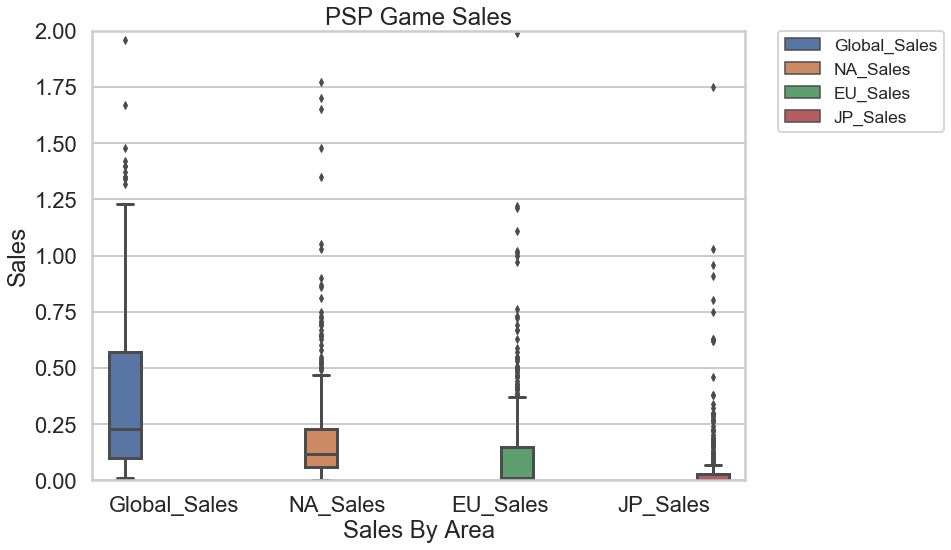

In [48]:
# Boxplot of PSP Game Sales
df_psp = pd.melt(df, id_vars='PSP', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_psp = df_psp[df_psp['PSP'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_psp, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PSP Game Sales')

** Because of how low the p-values are for Global as well as North American and European sales, we can reject the null hypothesis and say PSP games sell differently in those areas compared to Non-PSP games. In these areas, they sell worse.**

In [49]:
# Running a t-test for Wii U Games and Global Sales
print('Average amount of Wii U Games in Global Sales: ' + str(df.loc[df['Platform'] == 'WiiU']['Global_Sales'].mean()))
print('Average amount of Non-Wii U Games in Global Sales: ' + str(df.loc[df['Platform'] != 'WiiU']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'WiiU']['Global_Sales'], df.loc[df['Platform'] != 'WiiU']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Wii U Games and North American Sales
print('Average amount of Wii U Games in North American Sales: ' + str(df.loc[df['Platform'] == 'WiiU']['NA_Sales'].mean()))
print('Average amount of Non-Wii U Games in North American Sales: ' + str(df.loc[df['Platform'] != 'WiiU']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'WiiU']['NA_Sales'], df.loc[df['Platform'] != 'WiiU']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Wii U Games and European Sales
print('Average amount of Wii U Games in European Sales: ' + str(df.loc[df['Platform'] == 'WiiU']['EU_Sales'].mean()))
print('Average amount of Non-Wii U Games in European Sales: ' + str(df.loc[df['Platform'] != 'WiiU']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'WiiU']['EU_Sales'], df.loc[df['Platform'] != 'WiiU']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Wii U Games and Japanese Sales
print('Average amount of Wii U Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'WiiU']['JP_Sales'].mean()))
print('Average amount of Non-Wii U Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'WiiU']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'WiiU']['JP_Sales'], df.loc[df['Platform'] != 'WiiU']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Wii U Games in Global Sales: 0.742471910112
Average amount of Non-Wii U Games in Global Sales: 0.778053741093
Global t-statistic: -0.271748199394
Global p-value: 0.786410100053


Average amount of Wii U Games in North American Sales: 0.344831460674
Average amount of Non-Wii U Games in North American Sales: 0.395139548694
North American t-statistic: -0.846056854676
North American p-value: 0.399637908368


Average amount of Wii U Games in European Sales: 0.229438202247
Average amount of Non-Wii U Games in European Sales: 0.236177256532
European t-statistic: -0.181534487252
European p-value: 0.856323806922


Average amount of Wii U Games in Japanese Sales: 0.114269662921
Average amount of Non-Wii U Games in Japanese Sales: 0.0634961401425
Japanese t-statistic: 1.68402068386
Japanese p-value: 0.0956267258231


Text(0.5,1,'Nintendo Wii U Game Sales')

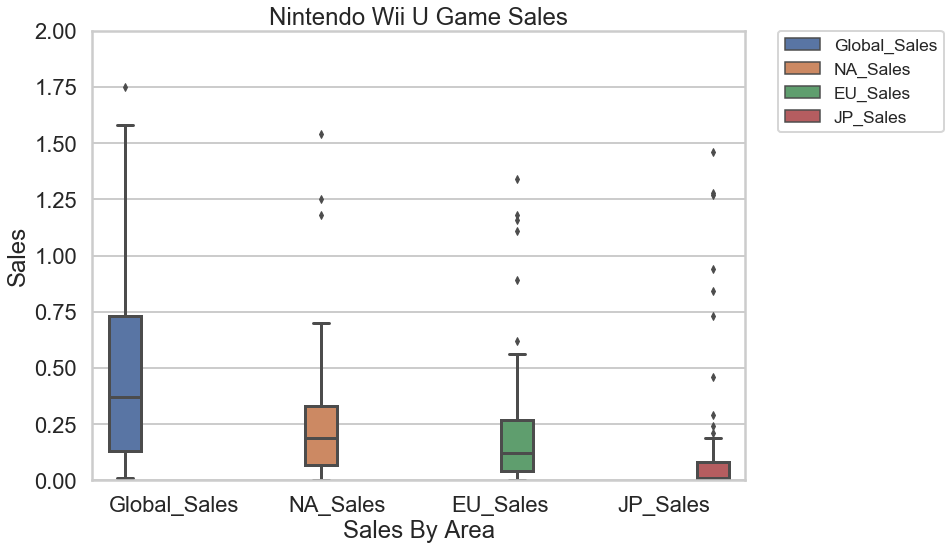

In [50]:
# Boxplot of Nintendo Wii U Game Sales
df_wiiu = pd.melt(df, id_vars='Nintendo Wii U', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_wiiu = df_wiiu[df_wiiu['Nintendo Wii U'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_wiiu, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nintendo Wii U Game Sales')

** Because of how high the p-values are for Global and all regional sales, we cannot reject the null hypothesis. Therefore, Wii U games do not sell better or worse in any area.**

In [51]:
# Running a t-test for GameCube Games and Global Sales
print('Average amount of GameCube Games in Global Sales: ' + str(df.loc[df['Platform'] == 'GC']['Global_Sales'].mean()))
print('Average amount of Non-GameCube Games in Global Sales: ' + str(df.loc[df['Platform'] != 'GC']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GC']['Global_Sales'], df.loc[df['Platform'] != 'GC']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for GameCube Games and North American Sales
print('Average amount of GameCube Games in North American Sales: ' + str(df.loc[df['Platform'] == 'GC']['NA_Sales'].mean()))
print('Average amount of Non-GameCube Games in North American Sales: ' + str(df.loc[df['Platform'] != 'GC']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GC']['NA_Sales'], df.loc[df['Platform'] != 'GC']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for GameCube Games and European Sales
print('Average amount of GameCube Games in European Sales: ' + str(df.loc[df['Platform'] == 'GC']['EU_Sales'].mean()))
print('Average amount of Non-GameCube Games in European Sales: ' + str(df.loc[df['Platform'] != 'GC']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GC']['EU_Sales'], df.loc[df['Platform'] != 'GC']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for GameCube Games and Japanese Sales
print('Average amount of GameCube Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'GC']['JP_Sales'].mean()))
print('Average amount of Non-GameCube Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'GC']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GC']['JP_Sales'], df.loc[df['Platform'] != 'GC']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of GameCube Games in Global Sales: 0.458103448276
Average amount of Non-GameCube Games in Global Sales: 0.794755287942
Global t-statistic: -7.11518622109
Global p-value: 2.92093294945e-12


Average amount of GameCube Games in North American Sales: 0.310143678161
Average amount of Non-GameCube Games in North American Sales: 0.399014976069
North American t-statistic: -3.21186111909
North American p-value: 0.00139797477235


Average amount of GameCube Games in European Sales: 0.0888793103448
Average amount of Non-GameCube Games in European Sales: 0.24399876486
European t-statistic: -13.2266910823
European p-value: 5.25622739304e-38


Average amount of GameCube Games in Japanese Sales: 0.0463218390805
Average amount of Non-GameCube Games in Japanese Sales: 0.0651165663116
Japanese t-statistic: -2.00980872343
Japanese p-value: 0.0450093577824


Text(0.5,1,'Nintendo GameCube Game Sales')

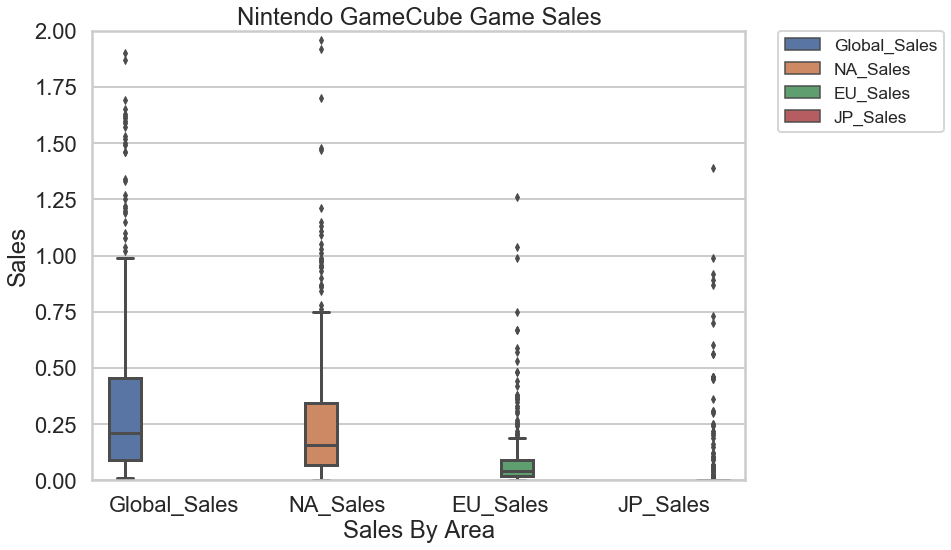

In [52]:
# Boxplot of Nintendo GameCube Game Sales
df_gc = pd.melt(df, id_vars='Nintendo GameCube', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_gc = df_gc[df_gc['Nintendo GameCube'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_gc, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Nintendo GameCube Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say GameCube games sell differently in those areas compared to Non-GameCube games. In all areas, they sell worse.**

In [53]:
# Running a t-test for Game Boy Advance Games and Global Sales
print('Average amount of Game Boy Advance Games in Global Sales: ' + str(df.loc[df['Platform'] == 'GBA']['Global_Sales'].mean()))
print('Average amount of Non-Game Boy Advance Games in Global Sales: ' + str(df.loc[df['Platform'] != 'GBA']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GBA']['Global_Sales'], df.loc[df['Platform'] != 'GBA']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Game Boy Advance Games and North American Sales
print('Average amount of Game Boy Advance Games in North American Sales: ' + str(df.loc[df['Platform'] == 'GBA']['NA_Sales'].mean()))
print('Average amount of Non-Game Boy Advance Games in North American Sales: ' + str(df.loc[df['Platform'] != 'GBA']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GBA']['NA_Sales'], df.loc[df['Platform'] != 'GBA']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Game Boy Advance Games and European Sales
print('Average amount of Game Boy Advance Games in European Sales: ' + str(df.loc[df['Platform'] == 'GBA']['EU_Sales'].mean()))
print('Average amount of Non-Game Boy Advance Games in European Sales: ' + str(df.loc[df['Platform'] != 'GBA']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GBA']['EU_Sales'], df.loc[df['Platform'] != 'GBA']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Game Boy Advance Games and Japanese Sales
print('Average amount of Game Boy Advance Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'GBA']['JP_Sales'].mean()))
print('Average amount of Non-Game Boy Advance Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'GBA']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'GBA']['JP_Sales'], df.loc[df['Platform'] != 'GBA']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Game Boy Advance Games in Global Sales: 0.555907172996
Average amount of Non-Game Boy Advance Games in Global Sales: 0.785564663024
Global t-statistic: -3.80069633664
Global p-value: 0.000171125806058


Average amount of Game Boy Advance Games in North American Sales: 0.334978902954
Average amount of Non-Game Boy Advance Games in North American Sales: 0.396624165149
North American t-statistic: -1.87590806238
North American p-value: 0.0615918337506


Average amount of Game Boy Advance Games in European Sales: 0.137552742616
Average amount of Non-Game Boy Advance Games in European Sales: 0.239634183364
European t-statistic: -5.98184148616
European p-value: 4.70811798488e-09


Average amount of Game Boy Advance Games in Japanese Sales: 0.06805907173
Average amount of Non-Game Boy Advance Games in Japanese Sales: 0.064017911354
Japanese t-statistic: 0.281009463111
Japanese p-value: 0.778919967834


Text(0.5,1,'Game Boy Advance Game Sales')

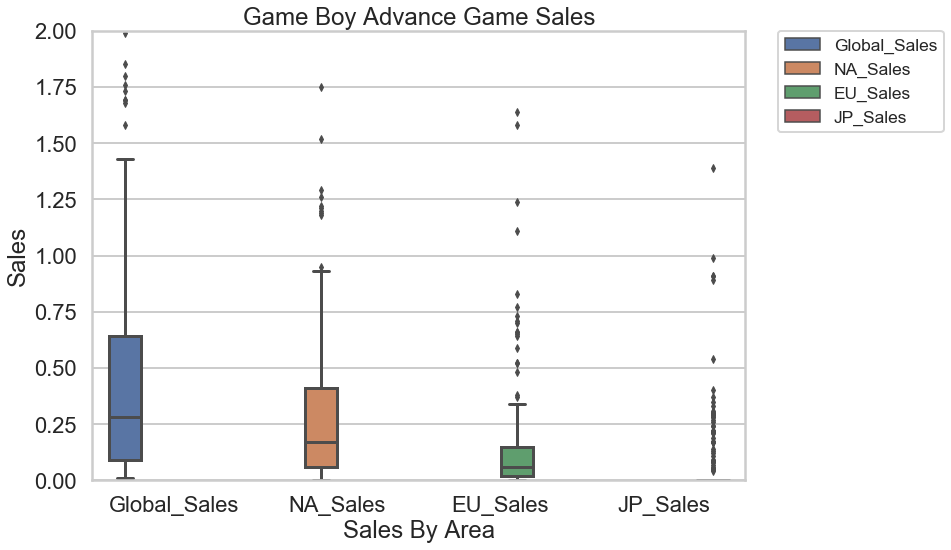

In [54]:
# Boxplot of Game Boy Advance Game Sales
df_gba = pd.melt(df, id_vars='Game Boy Advance', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_gba = df_gba[df_gba['Game Boy Advance'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_gba, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Game Boy Advance Game Sales')

** Because of how low the p-values are for Global and European sales, we can reject the null hypothesis and say Game Boy Advance games sell differently in those areas compared to Non-Game Boy Advance games. In both areas, they sell worse.**

In [55]:
# Running a t-test for Xbox One Games and Global Sales
print('Average amount of Xbox One Games in Global Sales: ' + str(df.loc[df['Platform'] == 'XOne']['Global_Sales'].mean()))
print('Average amount of Non-Xbox One Games in Global Sales: ' + str(df.loc[df['Platform'] != 'XOne']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XOne']['Global_Sales'], df.loc[df['Platform'] != 'XOne']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox One Games and North American Sales
print('Average amount of Xbox One Games in North American Sales: ' + str(df.loc[df['Platform'] == 'XOne']['NA_Sales'].mean()))
print('Average amount of Non-Xbox One Games in North American Sales: ' + str(df.loc[df['Platform'] != 'XOne']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XOne']['NA_Sales'], df.loc[df['Platform'] != 'XOne']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox One Games and European Sales
print('Average amount of Xbox One Games in European Sales: ' + str(df.loc[df['Platform'] == 'XOne']['EU_Sales'].mean()))
print('Average amount of Non-Xbox One Games in European Sales: ' + str(df.loc[df['Platform'] != 'XOne']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XOne']['EU_Sales'], df.loc[df['Platform'] != 'XOne']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Xbox One Games and Japanese Sales
print('Average amount of Xbox One Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'XOne']['JP_Sales'].mean()))
print('Average amount of Non-Xbox One Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'XOne']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'XOne']['JP_Sales'], df.loc[df['Platform'] != 'XOne']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Xbox One Games in Global Sales: 0.814905660377
Average amount of Non-Xbox One Games in Global Sales: 0.776699669967
Global t-statistic: 0.439908700426
Global p-value: 0.660514449058


Average amount of Xbox One Games in North American Sales: 0.47534591195
Average amount of Non-Xbox One Games in North American Sales: 0.392554755476
North American t-statistic: 1.5841001558
North American p-value: 0.114967919088


Average amount of Xbox One Games in European Sales: 0.26427672956
Average amount of Non-Xbox One Games in European Sales: 0.235417041704
European t-statistic: 0.891042842406
European p-value: 0.374081815227


Average amount of Xbox One Games in Japanese Sales: 0.00182389937107
Average amount of Non-Xbox One Games in Japanese Sales: 0.0656450645065
Japanese t-statistic: -17.7575974626
Japanese p-value: 5.3031338491e-69


Text(0.5,1,'Xbox One Game Sales')

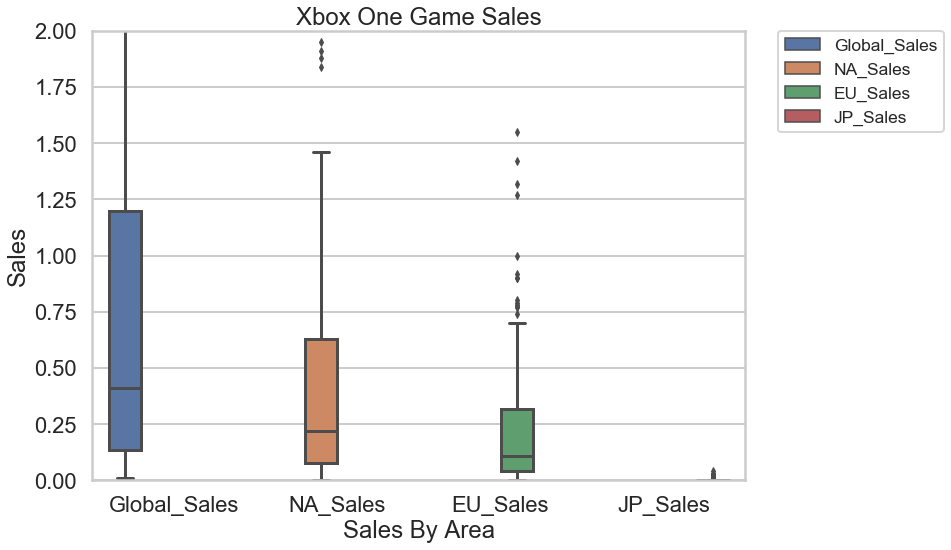

In [56]:
# Boxplot of Xbox One Game Sales
df_xo = pd.melt(df, id_vars='Xbox One', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_xo = df_xo[df_xo['Xbox One'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_xo, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Xbox One Game Sales')

** Because of how low the p-value is for Japanese sales, we can reject the null hypothesis and say Xbox One games sell differently in that area compared to Non-Xbox One games. In Japan, they sell worse.**

In [57]:
# Running a t-test for PlayStation Vita Games and Global Sales
print('Average amount of PlayStation Vita Games in Global Sales: ' + str(df.loc[df['Platform'] == 'PSV']['Global_Sales'].mean()))
print('Average amount of Non-PlayStation Vita Games in Global Sales: ' + str(df.loc[df['Platform'] != 'PSV']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSV']['Global_Sales'], df.loc[df['Platform'] != 'PSV']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Vita Games and North American Sales
print('Average amount of PlayStation Vita Games in North American Sales: ' + str(df.loc[df['Platform'] == 'PSV']['NA_Sales'].mean()))
print('Average amount of Non-PlayStation Vita Games in North American Sales: ' + str(df.loc[df['Platform'] != 'PSV']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSV']['NA_Sales'], df.loc[df['Platform'] != 'PSV']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Vita Games and European Sales
print('Average amount of PlayStation Vita Games in European Sales: ' + str(df.loc[df['Platform'] == 'PSV']['EU_Sales'].mean()))
print('Average amount of Non-PlayStation Vita Games in European Sales: ' + str(df.loc[df['Platform'] != 'PSV']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSV']['EU_Sales'], df.loc[df['Platform'] != 'PSV']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for PlayStation Vita Games and Japanese Sales
print('Average amount of PlayStation Vita Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'PSV']['JP_Sales'].mean()))
print('Average amount of Non-PlayStation Vita Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'PSV']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'PSV']['JP_Sales'], df.loc[df['Platform'] != 'PSV']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of PlayStation Vita Games in Global Sales: 0.261694915254
Average amount of Non-PlayStation Vita Games in Global Sales: 0.786666169673
Global t-statistic: -14.6783801584
Global p-value: 3.59528956149e-39


Average amount of PlayStation Vita Games in North American Sales: 0.0841525423729
Average amount of Non-PlayStation Vita Games in North American Sales: 0.399943342776
North American t-statistic: -19.5385446358
North American p-value: 7.66376053918e-65


Average amount of PlayStation Vita Games in European Sales: 0.0743220338983
Average amount of Non-PlayStation Vita Games in European Sales: 0.238935440584
European t-statistic: -11.9317275357
European p-value: 4.24286006575e-27


Average amount of PlayStation Vita Games in Japanese Sales: 0.0645762711864
Average amount of Non-PlayStation Vita Games in Japanese Sales: 0.0641508871328
Japanese t-statistic: 0.0527231327485
Japanese p-value: 0.958011217794


Text(0.5,1,'PlayStation Vita Game Sales')

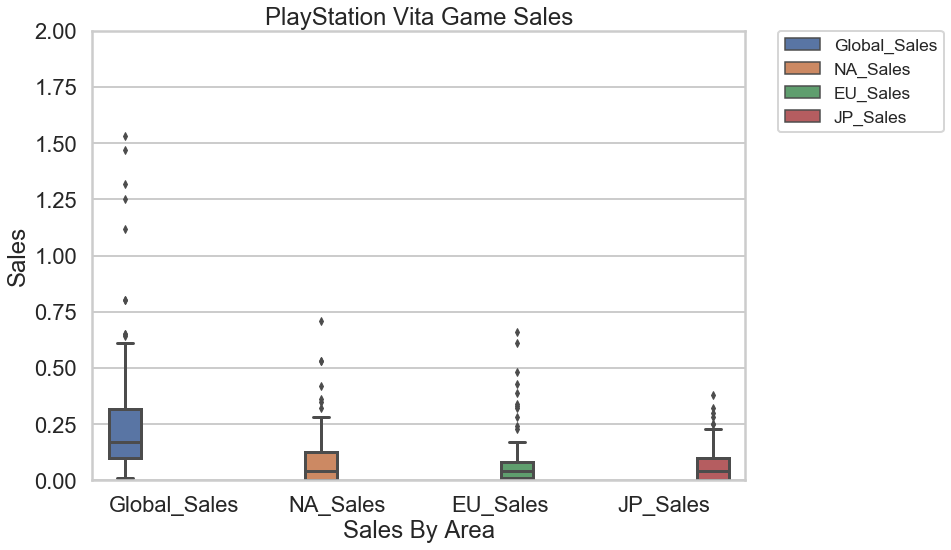

In [58]:
# Boxplot of PlayStation Vita Game Sales
df_psv = pd.melt(df, id_vars='PlayStation Vita', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_psv = df_psv[df_psv['PlayStation Vita'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_psv, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PlayStation Vita Game Sales')

** Because of how low the p-values are for Global as well as North American and European sales, we can reject the null hypothesis and say PlayStation Vita games sell differently in those areas compared to Non-PlayStation Vita games. In those areas, they sell worse.**

In [59]:
# Running a t-test for Dreamcast Games and Global Sales
print('Average amount of Dreamcast Games in Global Sales: ' + str(df.loc[df['Platform'] == 'DC']['Global_Sales'].mean()))
print('Average amount of Non-Dreamcast Games in Global Sales: ' + str(df.loc[df['Platform'] != 'DC']['Global_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DC']['Global_Sales'], df.loc[df['Platform'] != 'DC']['Global_Sales'], equal_var=False)
print('Global t-statistic: ' + str(t_stat))
print('Global p-value: ' + str(p))
print('\n')

# Running a t-test for Dreamcast Games and North American Sales
print('Average amount of Dreamcast Games in North American Sales: ' + str(df.loc[df['Platform'] == 'DC']['NA_Sales'].mean()))
print('Average amount of Non-Dreamcast Games in North American Sales: ' + str(df.loc[df['Platform'] != 'DC']['NA_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DC']['NA_Sales'], df.loc[df['Platform'] != 'DC']['NA_Sales'], equal_var=False)
print('North American t-statistic: ' + str(t_stat))
print('North American p-value: ' + str(p))
print('\n')

# Running a t-test for Dreamcast Games and European Sales
print('Average amount of Dreamcast Games in European Sales: ' + str(df.loc[df['Platform'] == 'DC']['EU_Sales'].mean()))
print('Average amount of Non-Dreamcast Games in European Sales: ' + str(df.loc[df['Platform'] != 'DC']['EU_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DC']['EU_Sales'], df.loc[df['Platform'] != 'DC']['EU_Sales'], equal_var=False)
print('European t-statistic: ' + str(t_stat))
print('European p-value: ' + str(p))
print('\n')

# Running a t-test for Dreamcast Games and Japanese Sales
print('Average amount of Dreamcast Games in Japanese Sales: ' + str(df.loc[df['Platform'] == 'DC']['JP_Sales'].mean()))
print('Average amount of Non-Dreamcast Games in Japanese Sales: ' + str(df.loc[df['Platform'] != 'DC']['JP_Sales'].mean()))
t_stat, p = stats.ttest_ind(df.loc[df['Platform'] == 'DC']['JP_Sales'], df.loc[df['Platform'] != 'DC']['JP_Sales'], equal_var=False)
print('Japanese t-statistic: ' + str(t_stat))
print('Japanese p-value: ' + str(p))

Average amount of Dreamcast Games in Global Sales: 0.325
Average amount of Non-Dreamcast Games in Global Sales: 0.77852004111
Global t-statistic: -4.529283946
Global p-value: 0.000425867513257


Average amount of Dreamcast Games in North American Sales: 0.11
Average amount of Non-Dreamcast Games in North American Sales: 0.395068271913
North American t-statistic: -3.56083322466
North American p-value: 0.00327242449638


Average amount of Dreamcast Games in European Sales: 0.0207142857143
Average amount of Non-Dreamcast Games in European Sales: 0.236532080458
European t-statistic: -11.2701646372
European p-value: 4.63091514944e-10


Average amount of Dreamcast Games in Japanese Sales: 0.19
Average amount of Non-Dreamcast Games in Japanese Sales: 0.0638995742182
Japanese t-statistic: 3.32982691134
Japanese p-value: 0.005314669669


Text(0.5,1,'Sega Dreamcast Game Sales')

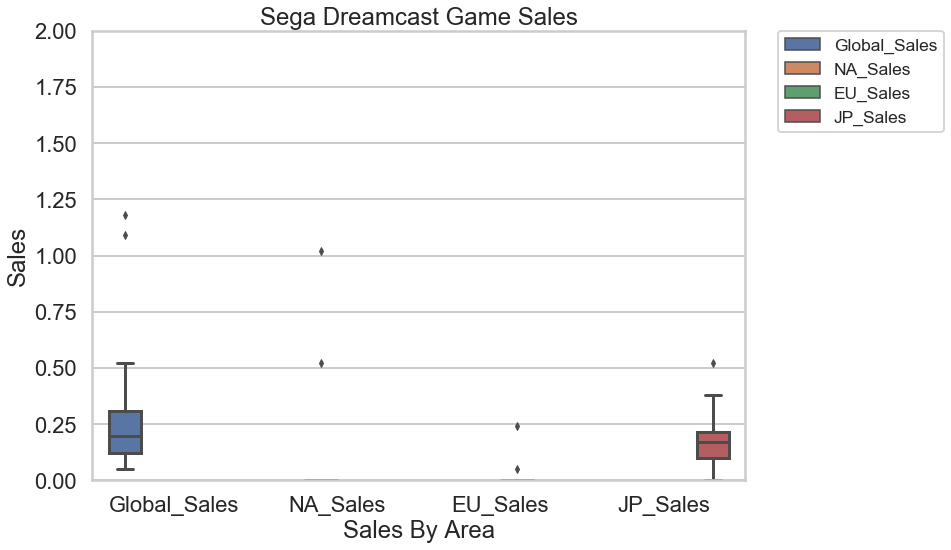

In [60]:
# Boxplot of Sega Dreamcast Game Sales
df_dc = pd.melt(df, id_vars='Sega Dreamcast', value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df_dc = df_dc[df_dc['Sega Dreamcast'] == 1]
ax = sns.boxplot(x='variable', y='value', data=df_dc, hue='variable')
ax.set_ylim(0, 2)
ax.set_xlabel('Sales By Area')
ax.set_ylabel('Sales')
plt.legend(fontsize=17.4, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Sega Dreamcast Game Sales')

** Because of how low the p-values are for Global as well as all regional sales, we can reject the null hypothesis and say Sega Dreamcast games sell differently in those areas compared to Non-Sega Dreamcast games. In all areas except Japan, they sell worse while in Japan they sell better.**

** For each chi-squared test below:
<br>
Ho = There is no association between factors
<br>
Ha = There is association between factors
<br>
α = 0.05**

In [61]:
# Running a chi-squared test for Platform and Genre
P_G_CT = pd.crosstab(df['Platform'], df['Genre'])
print(P_G_CT)
chi, p, d_f, e_f = stats.chi2_contingency(P_G_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
3DS           54          9         7    10        18       8       5   
DC             0          2         2     0         1       0       2   
DS            75         31        14    37        35      52      18   
GBA           51          9        13    12        48       6      21   
GC            69         13        24    16        44       6      31   
PC           130         25         3     3        10       4      43   
PS            27          5        15     4        16       2      17   
PS2          243         40        73    54        70       6     131   
PS3          228         19        56    41        22       1      62   
PS4           81         12        11     7        11       1      15   
PSP           74         13        30    21        20      11      39   
PSV           37         10         9     8        

** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Platform and Genre is not random.**

In [62]:
# Running a chi-squared test for PlayStation 2, Nintendo Wii and Xbox 360 Games vs. Action, Shooter and Sports Genres
obs = np.array([[243, 127, 196], [122, 29, 73], [233, 153, 140]])
chi, p, d_f, e_f = stats.chi2_contingency(obs)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

chi-squared: 28.6700954422
p-value: 9.12122163496e-06


** Because of how low the p-value is, we can reject the null hypothesis and say that the association between PS2, Wii and Xbox 360 games as well as Action, Shooter and Sports games is not random.**

In [63]:
# Running a chi-squared test for Developer and Genre
D_G_CT = pd.crosstab(df['Developer'], df['Genre'])
print(D_G_CT)
chi, p, d_f, e_f = stats.chi2_contingency(D_G_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Genre                                  Action  Adventure  Fighting  Misc  \
Developer                                                                  
10tacle Studios, Fusionsphere Systems       0          2         0     0   
1C, 1C Company                              0          0         0     0   
1C, Ino-Co, 1C Company                      0          0         0     0   
1C: Maddox Games                            0          0         0     0   
1C:Ino-Co                                   0          0         0     0   
1st Playable Productions                    0          0         0     1   
2015                                        0          0         0     0   
2D Boy                                      0          0         0     0   
2K Australia                                0          0         0     0   
2K Czech                                    3          0         0     0   
2K Games                                    0          0         0     0   
2K Marin    

** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Developer and Genre is not random.**

In [64]:
# Running a chi-squared test for Rating and Genre
R_G_CT = pd.crosstab(df['Rating'], df['Genre'])
print(R_G_CT)
chi, p, d_f, e_f = stats.chi2_contingency(R_G_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Genre   Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Rating                                                                
AO           1          0         0     0         0       0       0   
E          191         49         6   163       240      89     350   
E10+       299         32        14    80       104      24      79   
K-A          0          0         0     1         0       0       0   
M          557         85        45    11         3       0      17   
RP           0          0         0     0         0       0       0   
T          582         82       313   129        56       5     135   

Genre   Role-Playing  Shooter  Simulation  Sports  Strategy  
Rating                                                       
AO                 0        0           0       0         0  
E                 73       22         103     754        42  
E10+             100       34          28      74        62  
K-A                0        0           0       0 

** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Rating and Genre is not random.**

In [65]:
# Running a chi-squared test for E, T and M Ratings vs. Action, Shooter and Sports Genres
obs = np.array([[191, 22, 754], [582, 285, 104], [557, 523, 11]])
chi, p, d_f, e_f = stats.chi2_contingency(obs)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

chi-squared: 1809.54607199
p-value: 0.0


** Because of how low the p-value is, we can reject the null hypothesis and say that the association between E, T and M rated games as well as Action, Shooter and Sports games is not random.**

In [66]:
# Running a chi-squared test for Platform and Developer
P_D_CT = pd.crosstab(df['Platform'], df['Developer'])
print(P_D_CT)
chi, p, d_f, e_f = stats.chi2_contingency(P_D_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Developer  10tacle Studios, Fusionsphere Systems  1C, 1C Company  \
Platform                                                           
3DS                                            0               0   
DC                                             0               0   
DS                                             1               0   
GBA                                            0               0   
GC                                             0               0   
PC                                             0               2   
PS                                             0               0   
PS2                                            0               0   
PS3                                            0               0   
PS4                                            0               0   
PSP                                            0               0   
PSV                                            0               0   
Wii                                            1

** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Platform and Developer is not random.**

In [67]:
# Running a chi-squared test for Platform and Rating
P_R_CT = pd.crosstab(df['Platform'], df['Rating'])
print(P_R_CT)
chi, p, d_f, e_f = stats.chi2_contingency(P_R_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Rating    AO    E  E10+  K-A    M  RP    T
Platform                                  
3DS        0   54    50    0   11   0   40
DC         0    3     0    0    1   0   10
DS         0  231   140    0    9   0   84
GBA        0  169    18    0    6   0   44
GC         0  167    17    0   34   0  130
PC         0   99    63    0  242   1  246
PS         0   70     0    1   18   0   61
PS2        0  371    78    0  208   0  483
PS3        0  154   101    0  237   0  277
PS4        0   50    37    0   74   0   78
PSP        0  108    65    0   47   0  170
PSV        0   13    19    0   30   0   56
Wii        0  175   134    0   30   0  140
WiiU       0   29    36    0   14   0   10
X360       0  175   127    0  264   0  292
XB         1  178    17    0  146   0  223
XOne       0   36    28    0   62   0   33
chi-squared: 1401.53140779
p-value: 1.04877101256e-230


** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Platform and Rating is not random.**

In [68]:
# Running a chi-squared test for PlayStation 2, Nintendo Wii and Xbox 360 Games vs. E, T and M Ratings
obs = np.array([[371, 483, 208], [175, 140, 30], [175, 292, 264]])
chi, p, d_f, e_f = stats.chi2_contingency(obs)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

chi-squared: 143.029110257
p-value: 6.33940530474e-30


** Because of how low the p-value is, we can reject the null hypothesis and say that the association between PS2, Wii and Xbox 360 games as well as E, T and M rated games is not random.**

In [69]:
# Running a chi-squared test for Developer and Rating
D_R_CT = pd.crosstab(df['Developer'], df['Rating'])
print(D_R_CT)
chi, p, d_f, e_f = stats.chi2_contingency(D_R_CT)
print('chi-squared: ' + str(chi))
print('p-value: ' + str(p))

Rating                                 AO   E  E10+  K-A  M  RP   T
Developer                                                          
10tacle Studios, Fusionsphere Systems   0   0     0    0  0   0   2
1C, 1C Company                          0   0     0    0  0   0   2
1C, Ino-Co, 1C Company                  0   0     0    0  0   0   1
1C: Maddox Games                        0   0     0    0  0   0   2
1C:Ino-Co                               0   0     0    0  0   0   1
1st Playable Productions                0   0     1    0  0   0   1
2015                                    0   0     0    0  1   0   0
2D Boy                                  0   1     0    0  0   0   0
2K Australia                            0   0     0    0  3   0   0
2K Czech                                0   2     0    0  3   0   0
2K Games                                0   1     0    0  2   0   0
2K Marin                                0   0     0    0  5   0   0
2K Sports                               0   7   

** Because of how low the p-value is, we can reject the null hypothesis and say that the association between Developer and Rating is not random.**

** For each Pearson Correlation test below:
<br>
Ho = There is no relationship between factors
<br>
Ha = There is a relationship between factors
<br>
α = 0.05**

In [70]:
# Running a Pearson Correlation test between Global Sales and North American Sales
r, p = stats.pearsonr(df['Global_Sales'], df['NA_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.955793368968
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between Global Sales and North American Sales is statistically significant and there is also a strong positive correlation around 0.96 between the two. This means that Global Sales is predictive of North American Sales.**

In [71]:
# Running a Pearson Correlation test between Global Sales and European Sales
r, p = stats.pearsonr(df['Global_Sales'], df['EU_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.939313013238
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between Global Sales and European Sales is statistically significant and there is also a strong positive correlation around 0.94 between the two. This means that Global Sales is predictive of European Sales.**

In [72]:
# Running a Pearson Correlation test between Global Sales and Japanese Sales
r, p = stats.pearsonr(df['Global_Sales'], df['JP_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.613545596261
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between Global Sales and Japanese Sales is statistically significant and there is also a positive correlation around 0.61 between the two. This means that Global Sales is predictive of Japanese Sales.**

In [73]:
# Running a Pearson Correlation test between North American Sales and European Sales
r, p = stats.pearsonr(df['NA_Sales'], df['EU_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.841807563817
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between North American Sales and European Sales is statistically significant and there is also a strong positive correlation around 0.84 between the two. This means that North American Sales is predictive of European Sales.**

In [74]:
# Running a Pearson Correlation test between North American Sales and Japanese Sales
r, p = stats.pearsonr(df['NA_Sales'], df['JP_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.468607351091
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between North American Sales and Japanese Sales is statistically significant and there is also a positive correlation around 0.47 between the two. This means that North American Sales is predictive of Japanese Sales.**

In [75]:
# Running a Pearson Correlation test between European Sales and Japanese Sales
r, p = stats.pearsonr(df['EU_Sales'], df['JP_Sales'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.519928865621
p-value: 0.0


** Because of low high the p-value is, we can say the relationship between European Sales and Japanese Sales is statistically significant and there is also a positive correlation around 0.52 between the two. This means that European Sales is predictive of Japanese Sales.**

In [76]:
# Running a Pearson Correlation test between Global Sales and Critic Score
r, p = stats.pearsonr(df['Global_Sales'], df['Critic_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.237555722283
p-value: 3.5137111423e-88


** Because of low high the p-value is, we can say the relationship between Global Sales and Critic Score is statistically significant and there is also a weak positive correlation around 0.24 between the two. This means that Global Sales is predictive of Critic Score.**

In [77]:
# Running a Pearson Correlation test between Global Sales and User Score
r, p = stats.pearsonr(df['Global_Sales'], df['User_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.088348526347
p-value: 2.63685512321e-13


** Because of low high the p-value is, we can say the relationship between Global Sales and User Score is statistically significant and there is also a weak positive correlation around 0.09 between the two. This means that Global Sales is predictive of User Score.**

In [78]:
# Running a Pearson Correlation test between North American Sales and Critic Score
r, p = stats.pearsonr(df['NA_Sales'], df['Critic_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.233580308941
p-value: 3.09796918662e-85


** Because of low high the p-value is, we can say the relationship between North American Sales and Critic Score is statistically significant and there is also a weak positive correlation around 0.23 between the two. This means that North American Sales is predictive of Critic Score.**

In [79]:
# Running a Pearson Correlation test between North American Sales and User Score
r, p = stats.pearsonr(df['NA_Sales'], df['User_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.0857960109199
p-value: 1.2501988362e-12


** Because of low high the p-value is, we can say the relationship between North American Sales and User Score is statistically significant and there is also a weak positive correlation around 0.09 between the two. This means that North American Sales is predictive of User Score.**

In [80]:
# Running a Pearson Correlation test between European Sales and Critic Score
r, p = stats.pearsonr(df['EU_Sales'], df['Critic_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.213101933662
p-value: 6.25938324605e-71


** Because of low high the p-value is, we can say the relationship between European Sales and Critic Score is statistically significant and there is also a weak positive correlation around 0.21 between the two. This means that European Sales is predictive of Critic Score.**

In [81]:
# Running a Pearson Correlation test between European Sales and User Score
r, p = stats.pearsonr(df['EU_Sales'], df['User_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.0559154095283
p-value: 3.79799725291e-06


** Because of low high the p-value is, we can say the relationship between European Sales and User Score is statistically significant and there is also a weak positive correlation around 0.06 between the two. This means that European Sales is predictive of User Score.**

In [82]:
# Running a Pearson Correlation test between Japanese Sales and Critic Score
r, p = stats.pearsonr(df['JP_Sales'], df['Critic_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.147313940071
p-value: 2.02845286013e-34


** Because of low high the p-value is, we can say the relationship between Japanese Sales and Critic Score is statistically significant and there is also a weak positive correlation around 0.15 between the two. This means that Japanese Sales is predictive of Critic Score.**

In [83]:
# Running a Pearson Correlation test between Japanese Sales and User Score
r, p = stats.pearsonr(df['JP_Sales'], df['User_Score'])
print('r: ' + str(r))
print('p-value: ' + str(p))

r: 0.127521424437
p-value: 3.83930609948e-26


** Because of low high the p-value is, we can say the relationship between Japanese Sales and User Score is statistically significant and there is also a weak positive correlation around 0.13 between the two. This means that Japanese Sales is predictive of User Score.**